<a href="https://colab.research.google.com/github/b-suarez/youtube_stats_analysis/blob/main/Code/Youtube.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Load libraries



In [ ]:
import os
import io
from google.colab import files
import numpy as np
from matplotlib import pyplot as plt 
import seaborn as sns
import statistics as st
import pandas as pd
import zipfile
import math
import re
import string
import itertools
from wordcloud import WordCloud, STOPWORDS 
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer
import datetime as dt
import pickle
from tqdm import tqdm, trange,tqdm_notebook
from scipy import stats
from scipy.stats import kurtosis, skew
from scipy.stats import sem

from scipy.stats import anderson

%matplotlib inline


# Load data


## Code to get the data from Kaggle

In [ ]:
uploaded = files.upload()

In [ ]:
# Since the data is a line of characters, it is possible to use:
user_key=uploaded['kaggle.json'].decode("utf-8", errors="ignore")

user = user_key[13:28] #Select the rigth position for your name
key= user_key[37:-2] #Select the rigth positions for the key

#Other method
user_key_2 = pd.read_json('kaggle.json', lines=True)

In [ ]:
url="https://www.kaggle.com/datasnaek/youtube-new?select=USvideos.csv"

In [ ]:
os.environ['KAGGLE_USERNAME'] = user # username from the json file
os.environ['KAGGLE_KEY'] = key # key from the json file
!kaggle datasets download -d datasnaek/youtube-new # api copied from kaggle

## Code to load the data at the "local cloud"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


We will focus on DE, GB, MX and US. Two from America and two from Europe

In [ ]:
# Unzip the data

zf = zipfile.ZipFile(
    '/content/drive/MyDrive/Data_sets/YOUTUBE/youtube-new.zip', 
    'r'
    )


In [ ]:
# Germany 

videos_DE = zf.open(zipfile.ZipFile.namelist(zf)[3])

data_DE = pd.read_csv(videos_DE,encoding='maccentraleurope')

# Great Britain

videos_GB = zf.open(zipfile.ZipFile.namelist(zf)[7])

data_GB = pd.read_csv(videos_GB, encoding=' iso-8859-1')

# Mexico

videos_MX = zf.open(zipfile.ZipFile.namelist(zf)[15])

data_MX = pd.read_csv(videos_MX,encoding='latin1')

# United States of America 

videos_US = zf.open(zipfile.ZipFile.namelist(zf)[19])

data_US = pd.read_csv(videos_US, encoding=' iso-8859-1')

In [ ]:
data=[data_DE,data_GB,data_MX,data_US]

# Exploring data

## Getting familiar with the data (overall exploration)

We verify the data has been loaded properly

In [ ]:
# Uncomment the code you want to visualize the data

#data_GB.head()
#data_MX.head()
data_DE.head(50)
#data_US.tail()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,LgVi6y5QIjM,17.14.11,Sing zu Ende! | Gesangseinlagen vom Feinsten |...,inscope21,24,2017-11-13T17:08:49.000Z,"inscope21|""sing zu ende""|""gesangseinlagen""|""ge...",252786,35885,230,1539,https://i.ytimg.com/vi/LgVi6y5QIjM/default.jpg,False,False,False,Heute gibt es mal wieder ein neues Format... w...
1,Bayt7uQith4,17.14.11,Kinder ferngesteuert im Kiosk! Erwachsene abzo...,LUKE! Die Woche und ich,23,2017-11-12T22:30:01.000Z,"Kinder|""ferngesteuert""|""Kinder ferngesteuert""|...",797196,53576,302,1278,https://i.ytimg.com/vi/Bayt7uQith4/default.jpg,False,False,False,Kinder ferngesteuert! Kinder lassen sich sooo ...
2,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97190,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
3,AHtypnRk7JE,17.14.11,Das Fermi-Paradoxon,100SekundenPhysik,27,2017-11-12T15:00:01.000Z,"Physik|""Wissenschaft""|""Technik""|""Science-Ficti...",380247,31821,458,1955,https://i.ytimg.com/vi/AHtypnRk7JE/default.jpg,False,False,False,‚ĖļAlle Videos: http://bit.ly/1fa7Tw3\n\n\n‚úö...
4,ZJ9We4bjcg0,17.14.11,18 SONGS mit Kelly MissesVlog (Sing-off),rezo,24,2017-11-12T13:10:36.000Z,"kelly|""missesvlog""|""kelly song""|""bausa""|""bausa...",822213,100684,2467,10244,https://i.ytimg.com/vi/ZJ9We4bjcg0/default.jpg,False,False,False,18 Song Mashup √ľber den (ver√§nderten) Beat v...
5,xapGFgWqtg4,17.14.11,Geld verdienen mit Online-Umfragen? Geht das w...,Die Allestester,22,2017-11-13T01:49:24.000Z,[none],32709,3093,296,63,https://i.ytimg.com/vi/xapGFgWqtg4/default.jpg,False,False,False,Wir haben Meinungsstudie.de (‚Ėļ http://bit.ly...
6,EIM7RMe39JY,17.14.11,Kanaken auf der Klassenfahrt,Bodyformus,23,2017-11-13T11:59:04.000Z,"kanaken|""kurden""|""t√ľrken""|""schule""|""schulzeit...",308683,35704,578,1398,https://i.ytimg.com/vi/EIM7RMe39JY/default.jpg,False,False,False,Video mit Planet Kanax: https://youtu.be/3U51c...
7,PaWTaj6Iie0,17.14.11,3 unbekannte Gesichter von Film/Serien-Charakt...,Jay & Arya,22,2017-11-13T18:09:55.000Z,"unbekannte gesichte charakter|""unbekannte gesi...",181660,17998,169,554,https://i.ytimg.com/vi/PaWTaj6Iie0/default.jpg,False,False,False,4 unbekannte Gesichter animierter Charaktere (...
8,GHct2dGNLks,17.14.11,Antoine leiht Auto von Ern√§hrungsberaterin,TeddyComedy,23,2017-11-12T11:53:45.000Z,"Antoine Auto|""Antoine Boot Camp""|""Antoine Ern√...",369173,16953,570,611,https://i.ytimg.com/vi/GHct2dGNLks/default.jpg,False,False,False,Antoine hat sich ein Auto ausgeliehen..schaut ...
9,aZYSFByDGkg,17.14.11,Legenden: So wird dein Ruhm unsterblich - Fame...,WALULIS,1,2017-11-13T15:06:12.000Z,"michael jackson|""promi""|""tot""|""tod""|""gestorben...",62418,4749,44,425,https://i.ytimg.com/vi/aZYSFByDGkg/default.jpg,False,False,False,"Ber√ľhmt werden kann jeder, aber ber√ľhmt blei..."


It stands out the format of the date for the atributes `trending_date` and `publish_time`. The first one yy.dd.mm and the second one yy-mm-dd. In order to work with the data, it is necessary to standarize the formats.

The atributes `comments_disabled`, `ratings_disabled` and `video_error_or_removed`, seems to be mainly set to `False`.

In [ ]:

True_data_comment= [data_DE.comments_disabled.value_counts()[1],data_GB.comments_disabled.value_counts()[1],data_MX.comments_disabled.value_counts()[1],
            data_US.comments_disabled.value_counts()[1]]
True_data_rating= [data_DE.ratings_disabled.value_counts()[1],data_GB.ratings_disabled.value_counts()[1],data_MX.ratings_disabled.value_counts()[1],
            data_US.ratings_disabled.value_counts()[1]]
True_data_error= [data_DE.video_error_or_removed.value_counts()[1],data_GB.video_error_or_removed.value_counts()[1],data_MX.video_error_or_removed.value_counts()[1],
            data_US.video_error_or_removed.value_counts()[1]]

mean_value=np.mean([len(data_DE),len(data_GB),len(data_MX),len(data_US)])

True_data =[True_data_comment,True_data_rating,True_data_error]

(True_data/mean_value)*100

array([[2.59127802, 1.69525181, 1.09210951, 1.57114845],
       [1.66794907, 0.67512224, 1.57363052, 0.41946933],
       [0.03474894, 0.17126263, 0.05956961, 0.05708754]])

It is possible confirm that overall, $+95\%$ of the data is at the `False` category. Therefore, we will not consider the data in the `True` categories for our first analysis and models of the data.

In [ ]:
data_US.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

One can see the there is no null-value and the attributes `category_id`, `views`, `likes`, `dislikes` and `comment_count`have an expected type int64.

## Data visualization




### Plot category

#### Load metada

In [ ]:
# Germany

metadata_DE = zf.open(zipfile.ZipFile.namelist(zf)[2])

metadata_DE = pd.read_json(metadata_DE,encoding='maccentraleurope')

# Great Britain

metadata_GB = zf.open(zipfile.ZipFile.namelist(zf)[6])

metadata_GB = pd.read_json(metadata_GB, encoding=' iso-8859-1')

# Mexico

metadata_MX = zf.open(zipfile.ZipFile.namelist(zf)[14])

metadata_MX = pd.read_json(metadata_MX,encoding='latin1')

# United States of America 

metadata_US = zf.open(zipfile.ZipFile.namelist(zf)[18])

metadata_US = pd.read_json(metadata_US, encoding=' iso-8859-1')

#### Dictionaries with the descriptive names of each category and its numeric category

In [ ]:
#4 empty dictionaries
category_DE={}
category_GB={}
category_MX={}
category_US={}

#dictionaries and metadata in two matching lists by index

categories = [category_DE,category_GB,category_MX,category_US]

metadata=[metadata_DE,metadata_GB,metadata_MX,metadata_US]

#iterating the data to create a list of dictionaries

for category in categories:
  for i in range(len(metadata[categories.index(category)]['items'])):

    key=metadata[categories.index(category)]['items'][i]['id']
    value=metadata[categories.index(category)]['items'][i]['snippet']['title']
    category[key] = value



The dictionaries are compared to ensure that all 4 dataset have the same keys.

In [ ]:
for i in range(0,3):
  print(categories[0].keys()==categories[i].keys())


True
True
True


In [ ]:
category_id_count_DE  = data_DE['category_id'].value_counts()
category_id_count_GB  = data_GB['category_id'].value_counts()
category_id_count_MX  = data_MX['category_id'].value_counts()
category_id_count_US  = data_US['category_id'].value_counts()



category_id_count=[category_id_count_DE,category_id_count_GB,category_id_count_MX,category_id_count_US]

counts_per_category_DE={}
counts_per_category_GB={}
counts_per_category_MX={}
counts_per_category_US={}

counts_per_category=[counts_per_category_DE,counts_per_category_GB,counts_per_category_MX,counts_per_category_US]

category=categories[0]



for j in range(len(counts_per_category)):

  for i in range(len(category_id_count[j])):

    try:
      key=category[str(category_id_count[j].index[i])]
    except KeyError:
      key='Unknown_category_'+str(category_id_count[j].index[i])
    
    try:
      value=category_id_count[j].values[i]
    except:
      value='No_value'
    
    counts_per_category[j][key]=value
    


There is a missing name on the category description

#### Plot category

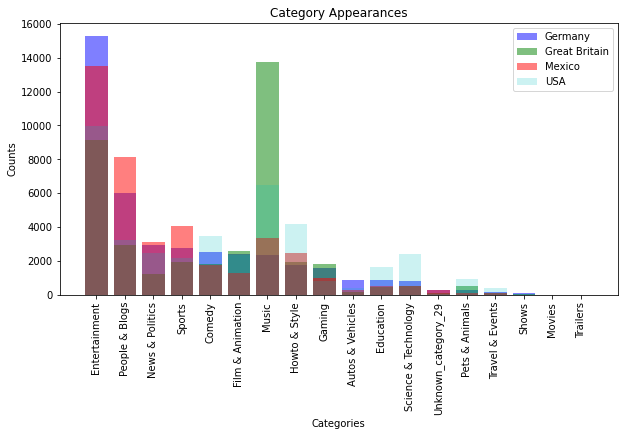

In [ ]:
plt.figure(figsize=(10,5))

labels=['Germany','Great Britain','Mexico','USA']

plt.bar(counts_per_category[0].keys(), counts_per_category[0].values(), color = 'b',alpha=0.5)
plt.bar(counts_per_category[1].keys(), counts_per_category[1].values(), color = 'g',alpha=0.5)
plt.bar(counts_per_category[2].keys(), counts_per_category[2].values(), color = 'r',alpha=0.5)
plt.bar(counts_per_category[3].keys(), counts_per_category[3].values(), color = 'c',alpha=0.2)
plt.xticks(rotation=90)
plt.title("Category Appearances",  loc='center')
plt.xlabel("Categories")
plt.ylabel("Counts")
plt.legend(labels)


plt.show()



We get a hint that different areas may be interested on different topics. We will findout up to what extend the diferences are statistically siginificant.

Plot `views`, `likes`, `dislikes` and `comment_count`

In [ ]:
# Initilize empty dictionaries
keys = ['DE','GB','MX','US']
views_count = dict.fromkeys(keys, None)
likes_count = dict.fromkeys(keys, None)
dislikes_count = dict.fromkeys(keys, None)
comment_count_counts = dict.fromkeys(keys, None)

# Create list of dictionaries
counts_video_properties = [views_count,likes_count,dislikes_count,comment_count_counts]

#list of data

data=[data_DE,data_GB,data_MX,data_US]

#labels

labels_list=['views','likes','dislikes','comment_count']

#Popilate lists
for label in labels_list:
  for key in keys:
    counts_video_properties[labels_list.index(label)][key]=data[keys.index(key)][label].value_counts()



### Plot `views`

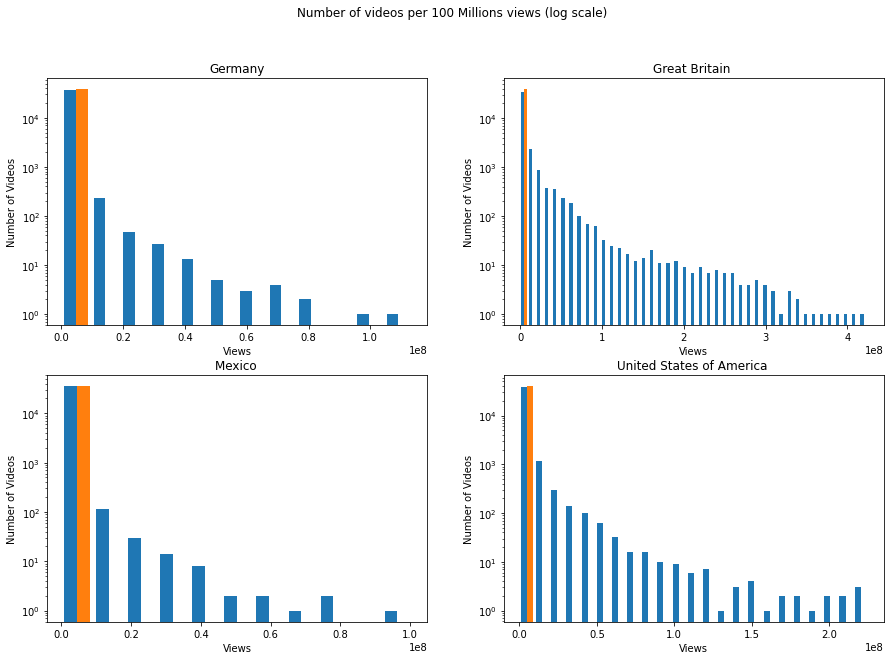

In [ ]:

view_DE=(counts_video_properties[0]['DE'].index.tolist(),counts_video_properties[0]['DE'].tolist())
view_GB=(counts_video_properties[0]['GB'].index.tolist(),counts_video_properties[0]['GB'].tolist())
view_MX=(counts_video_properties[0]['MX'].index.tolist(),counts_video_properties[0]['MX'].tolist())
view_US=(counts_video_properties[0]['US'].index.tolist(),counts_video_properties[0]['US'].tolist())

w = 10_000_000

plt.figure(figsize=(15,10))

plt.subplot(221)
n = math.ceil((max(view_DE[0]) - min(view_DE[0]))/w)
plt.hist(view_DE, bins = n)
plt.yscale('log')
plt.title("Germany",  loc='center')
plt.xlabel("Views")
plt.ylabel("Number of Videos")


plt.subplot(222)
n = math.ceil((max(view_GB[0]) - min(view_GB[0]))/w)
plt.hist(view_GB, bins = n)
plt.yscale('log')
plt.title("Great Britain ",  loc='center')
plt.xlabel("Views")
plt.ylabel("Number of Videos")


plt.subplot(223)
n = math.ceil((max(view_MX[0]) - min(view_MX[0]))/w)
plt.hist(view_MX, bins = n)
plt.yscale('log')
plt.title("Mexico ",  loc='center')
plt.xlabel("Views")
plt.ylabel("Number of Videos")


plt.subplot(224)
n = math.ceil((max(view_US[0]) - min(view_US[0]))/w)
plt.hist(view_US, bins = n)
plt.yscale('log')
plt.title("United States of America ",  loc='center')
plt.xlabel("Views")
plt.ylabel("Number of Videos")

plt.suptitle('Number of videos per 100 Millions views (log scale)')
plt.show()




### Plot `likes`

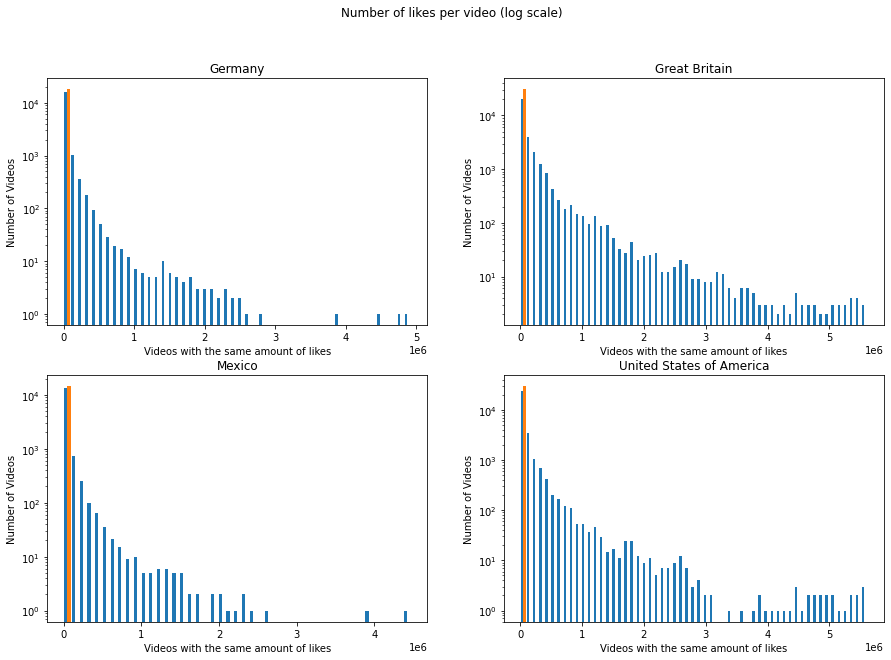

In [ ]:
likes_DE=(counts_video_properties[1]['DE'].index.tolist(),counts_video_properties[1]['DE'].tolist())
likes_GB=(counts_video_properties[1]['GB'].index.tolist(),counts_video_properties[1]['GB'].tolist())
likes_MX=(counts_video_properties[1]['MX'].index.tolist(),counts_video_properties[1]['MX'].tolist())
likes_US=(counts_video_properties[1]['US'].index.tolist(),counts_video_properties[1]['US'].tolist())

title_label=["Germany","Great Britain", "Mexico", "United States of America"]


likes_per_country = [likes_DE,likes_GB,likes_MX,likes_US]

w = 100_000

plt.figure(figsize=(15,10))

for like in likes_per_country:

  index_like=likes_per_country.index(like)
  n = math.ceil((max(like[0]) - min(like[0]))/w)
  plt.subplot(2, 2, index_like+1)
  plt.hist(like, bins = n)
  plt.yscale('log')
  plt.title(title_label[index_like],  loc='center')
  plt.xlabel("Videos with the same amount of likes")
  plt.ylabel("Number of Videos")  



plt.suptitle('Number of likes per video (log scale)')
plt.show()




### Plot `dislikes`


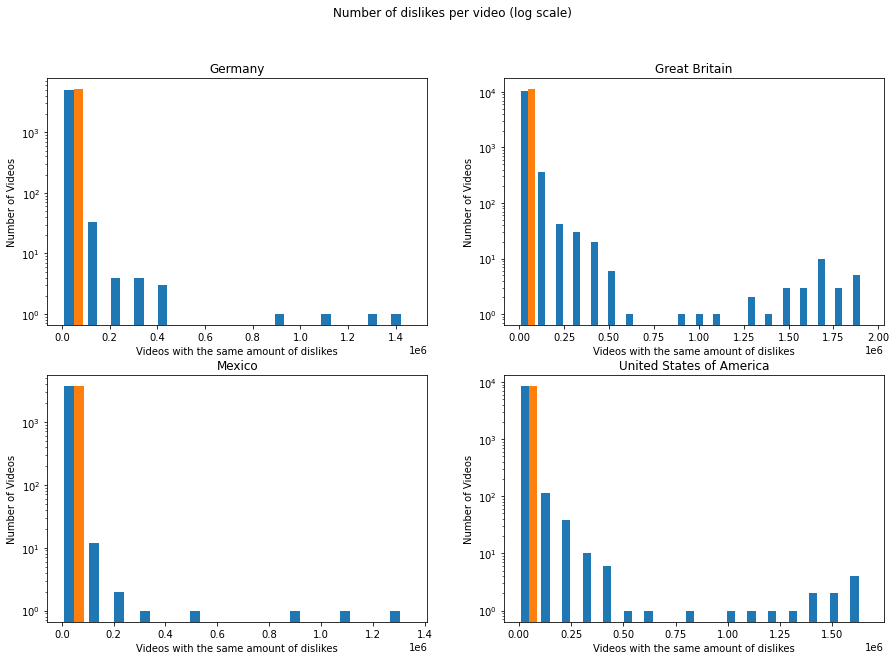

In [ ]:
dislikes_DE=(counts_video_properties[2]['DE'].index.tolist(),counts_video_properties[2]['DE'].tolist())
dislikes_GB=(counts_video_properties[2]['GB'].index.tolist(),counts_video_properties[2]['GB'].tolist())
dislikes_MX=(counts_video_properties[2]['MX'].index.tolist(),counts_video_properties[2]['MX'].tolist())
dislikes_US=(counts_video_properties[2]['US'].index.tolist(),counts_video_properties[2]['US'].tolist())

dislikes_per_country=[dislikes_DE,dislikes_GB,dislikes_MX,dislikes_US]

w = 100_000

plt.figure(figsize=(15,10))

for dlike in dislikes_per_country:

  index_dlike=dislikes_per_country.index(dlike)
  n = math.ceil((max(dlike[0]) - min(dlike[0]))/w)
  plt.subplot(2, 2, index_dlike+1)
  plt.hist(dlike, bins = n)
  plt.yscale('log')
  plt.title(title_label[index_dlike],  loc='center')
  plt.xlabel("Videos with the same amount of dislikes")
  plt.ylabel("Number of Videos")  



plt.suptitle('Number of dislikes per video (log scale)')
plt.show()

### Plot `comment_count`

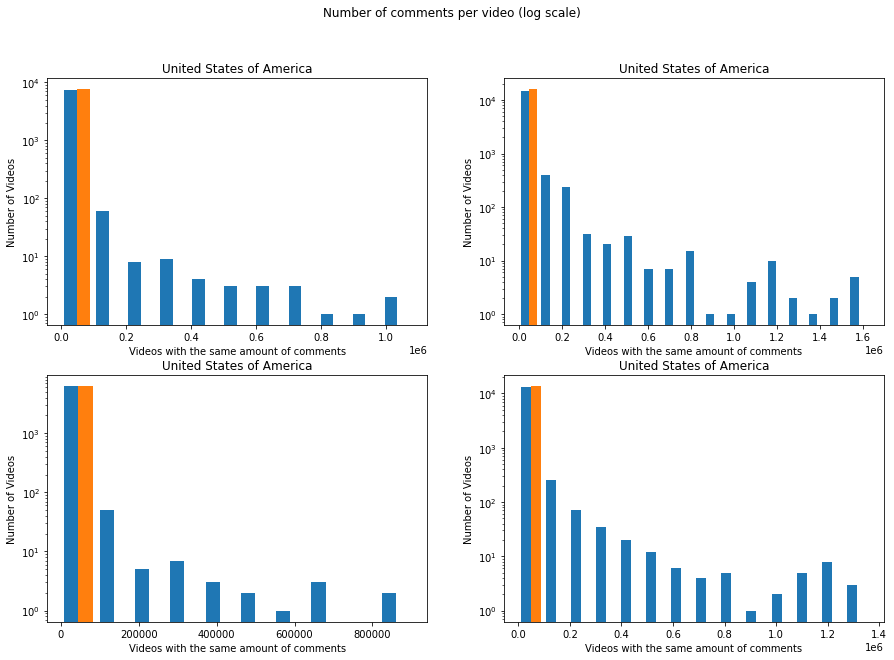

In [ ]:
cc_DE=(counts_video_properties[3]['DE'].index.tolist(),counts_video_properties[3]['DE'].tolist())
cc_GB=(counts_video_properties[3]['GB'].index.tolist(),counts_video_properties[3]['GB'].tolist())
cc_MX=(counts_video_properties[3]['MX'].index.tolist(),counts_video_properties[3]['MX'].tolist())
cc_US=(counts_video_properties[3]['US'].index.tolist(),counts_video_properties[3]['US'].tolist())

cc_per_country=[cc_DE,cc_GB,cc_MX,cc_US]

w = 100_000

plt.figure(figsize=(15,10))

for cc in cc_per_country:

  index_cc=cc_per_country.index(cc)
  n = math.ceil((max(cc[0]) - min(cc[0]))/w)
  plt.subplot(2, 2, index_cc+1)
  plt.hist(cc, bins = n)
  plt.yscale('log')
  plt.title(title_label[index_dlike],  loc='center')
  plt.xlabel("Videos with the same amount of comments")
  plt.ylabel("Number of Videos")  



plt.suptitle('Number of comments per video (log scale)')
plt.show()

### Plot Word Cloud for video tags

#### Tags to list

In [ ]:
tags_DE=[]
tags_GB=[]
tags_MX=[]
tags_US=[]

tags=[tags_DE,tags_GB,tags_MX,tags_US]

counter=0

for i in range(4):
  data_tags=data[i]['tags']

  for tag in data_tags:
   
    tags[i].append(re.findall(r'"(.*?)"', tag))
    counter += 1


#### Word Cloud



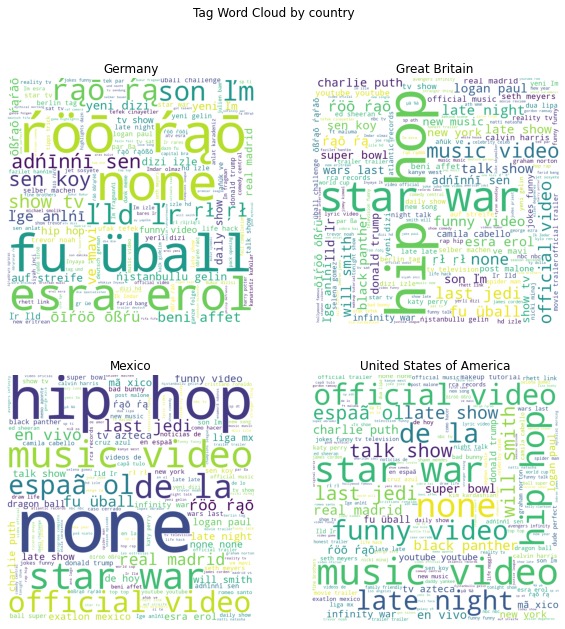

In [ ]:


comment_words = '' 
stopwords = set(STOPWORDS) 

plt.figure(figsize=(10,10), facecolor = None)
wordcloud=[]

for j in range(4):
  for val in data[j]['tags']: 
      
      # typecaste each val to string 
      val = str(val)
      #val=val.replace("√§","v")  # Some corrections for German
      #val=val.replace("√", "u")  # Some corrections for German
    
  
      # split the value 
      tokens = val.split()
    
      for i in range(len(tokens)): 
          tokens[i] = tokens[i].lower() 
      
      comment_words += " ".join(tokens)+" "
  
  wordcloud=WordCloud(width = 800, height = 800, 
                  background_color ='white', 
                  stopwords = stopwords, 
                  min_font_size = 10).generate(comment_words)

  # plot the WordCloud image
  plt.subplot(2, 2, j+1)                         
  plt.imshow(wordcloud) 
  plt.axis("off") 
  plt.title(title_label[j],  loc='center')
  

plt.suptitle('Tag Word Cloud by country') 
plt.show()

the tags need quiete some cleaning. Many problems come from the fact that non standar english characters are not properli recognized. The same problems are found at the video title attribute. Anyhow some relevant topics seems to arise. Football for Germany. Starwars for the other countries. Music videos, it appears that hip hop seems to be relevant.

## Descriptive Statistics

Germany

In [ ]:
pd.concat([data[0].describe(),
           pd.DataFrame(data[0].median() , columns = ["Median"] ).T,
           pd.DataFrame(data[0].kurt() , columns = ["Kurtosis"] ).T])


,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
count,40840.000000,4.084000e+04,4.084000e+04,4.084000e+04,4.084000e+04,NaN,NaN,NaN
mean,20.705828,6.034553e+05,2.187550e+04,1.397136e+03,2.785857e+03,NaN,NaN,NaN
std,6.975813,2.348963e+06,1.018000e+05,1.457738e+04,1.745803e+04,NaN,NaN,NaN
min,1.000000,5.180000e+02,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,NaN
25%,20.000000,2.706875e+04,5.330000e+02,2.900000e+01,7.900000e+01,NaN,NaN,NaN
50%,24.000000,1.192770e+05,2.699000e+03,1.340000e+02,3.760000e+02,NaN,NaN,NaN
75%,24.000000,4.431015e+05,1.179625e+04,5.320000e+02,1.376000e+03,NaN,NaN,NaN
max,44.000000,1.138762e+08,4.924056e+06,1.470386e+06,1.084435e+06,NaN,NaN,NaN
Median,24.000000,1.192770e+05,2.699000e+03,1.340000e+02,3.760000e+02,0.000000,0.000000,0.000000
Kurtosis,2.511423,4.881453e+02,5.636242e+02,5.645977e+03,1.459557e+03,34.149335,55.797517,2912.499909


Great Britain

In [ ]:
pd.concat([data[1].describe(),
           pd.DataFrame(data[1].median() , columns = ["Median"] ).T,
           pd.DataFrame(data[1].kurt() , columns = ["Kurtosis"] ).T])

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
count,38916.000000,3.891600e+04,3.891600e+04,3.891600e+04,3.891600e+04,NaN,NaN,NaN
mean,16.827937,5.911944e+06,1.345196e+05,7.612560e+03,1.308835e+04,NaN,NaN,NaN
std,7.752728,1.900121e+07,3.499893e+05,5.095683e+04,5.066740e+04,NaN,NaN,NaN
min,1.000000,8.510000e+02,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,NaN
25%,10.000000,2.515272e+05,5.897000e+03,2.000000e+02,6.790000e+02,NaN,NaN,NaN
50%,20.000000,9.818890e+05,2.518250e+04,8.210000e+02,2.478000e+03,NaN,NaN,NaN
75%,24.000000,3.683628e+06,1.140892e+05,3.357500e+03,9.241500e+03,NaN,NaN,NaN
max,43.000000,4.245389e+08,5.613827e+06,1.944971e+06,1.626501e+06,NaN,NaN,NaN
Median,20.000000,9.818890e+05,2.518250e+04,8.210000e+02,2.478000e+03,0.000000,0.000000,0.000000
Kurtosis,-1.071541,1.154120e+02,6.646395e+01,8.752774e+02,3.447289e+02,52.002738,138.098465,559.073759


Mexico

In [ ]:
pd.concat([data[2].describe(),
           pd.DataFrame(data[2].median() , columns = ["Median"] ).T,
           pd.DataFrame(data[2].kurt() , columns = ["Kurtosis"] ).T])

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
count,40451.000000,4.045100e+04,4.045100e+04,4.045100e+04,40451.000000,NaN,NaN,NaN
mean,21.003140,3.423820e+05,1.586184e+04,7.471604e+02,2039.660008,NaN,NaN,NaN
std,5.878995,1.714691e+06,8.108987e+04,1.095358e+04,13938.031797,NaN,NaN,NaN
min,1.000000,1.570000e+02,0.000000e+00,0.000000e+00,0.000000,NaN,NaN,NaN
25%,20.000000,1.681300e+04,2.990000e+02,1.700000e+01,42.000000,NaN,NaN,NaN
50%,24.000000,5.697300e+04,1.246000e+03,6.300000e+01,196.000000,NaN,NaN,NaN
75%,24.000000,2.068940e+05,7.226000e+03,2.670000e+02,885.000000,NaN,NaN,NaN
max,43.000000,1.009124e+08,4.470923e+06,1.353667e+06,905925.000000,NaN,NaN,NaN
Median,24.000000,5.697300e+04,1.246000e+03,6.300000e+01,196.000000,0.000000,0.000000,0.000000
Kurtosis,3.175815,8.129144e+02,8.018319e+02,9.703995e+03,1854.607182,86.955984,58.826181,1680.666809


United States of America

In [ ]:
pd.concat([data[3].describe(),
           pd.DataFrame(data[3].median() , columns = ["Median"] ).T,
           pd.DataFrame(data[3].kurt() , columns = ["Kurtosis"] ).T])

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
count,40949.000000,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04,NaN,NaN,NaN
mean,19.972429,2.360785e+06,7.426670e+04,3.711401e+03,8.446804e+03,NaN,NaN,NaN
std,7.568327,7.394114e+06,2.288853e+05,2.902971e+04,3.743049e+04,NaN,NaN,NaN
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,NaN
25%,17.000000,2.423290e+05,5.424000e+03,2.020000e+02,6.140000e+02,NaN,NaN,NaN
50%,24.000000,6.818610e+05,1.809100e+04,6.310000e+02,1.856000e+03,NaN,NaN,NaN
75%,25.000000,1.823157e+06,5.541700e+04,1.938000e+03,5.755000e+03,NaN,NaN,NaN
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06,NaN,NaN,NaN
Median,24.000000,6.818610e+05,1.809100e+04,6.310000e+02,1.856000e+03,0.000000,0.000000,0.000000
Kurtosis,0.342947,2.323803e+02,1.778471e+02,1.987423e+03,5.321442e+02,59.713502,237.335044,1775.608813


### Conclusions

* The relative diference between median and mean is for all the cases above $2\%$. The values of the kurtosis test for all the cases are out of the range -2 to +2. Therefore, the atributes are not following a normal distribution.

* Due to the plot data and the differences between max and min, anad mean and median is clear the presence of extremelly different values. These values are, in principle, not errors but extremelly popular videos.

# Data cleaning

## Remove `True` observations from logical atributes

In [ ]:
data_treat=[]

for dt in data:
  data_treat.append(dt[(dt['comments_disabled']== False) & 
                            (dt['ratings_disabled']== False) & 
                            (dt['video_error_or_removed']== False)])

In [ ]:
for i in range(4):

  print(round((len(data_treat[i])/len(data[i]))*100,2))

96.33
97.94
97.62
98.24


In [ ]:
#Remove columsn with constant values

for df in data_treat:

  drop_cols=['comments_disabled','ratings_disabled','video_error_or_removed']

  df.drop(drop_cols, axis=1, inplace=True)
  df.reset_index(drop=True, inplace=True)#Reset indexes

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
data_treat[0].head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,description
0,LgVi6y5QIjM,17.14.11,Sing zu Ende! | Gesangseinlagen vom Feinsten |...,inscope21,24,2017-11-13T17:08:49.000Z,"inscope21|""sing zu ende""|""gesangseinlagen""|""ge...",252786,35885,230,1539,https://i.ytimg.com/vi/LgVi6y5QIjM/default.jpg,Heute gibt es mal wieder ein neues Format... w...
1,Bayt7uQith4,17.14.11,Kinder ferngesteuert im Kiosk! Erwachsene abzo...,LUKE! Die Woche und ich,23,2017-11-12T22:30:01.000Z,"Kinder|""ferngesteuert""|""Kinder ferngesteuert""|...",797196,53576,302,1278,https://i.ytimg.com/vi/Bayt7uQith4/default.jpg,Kinder ferngesteuert! Kinder lassen sich sooo ...
2,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97190,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,"One year after the presidential election, John..."
3,AHtypnRk7JE,17.14.11,Das Fermi-Paradoxon,100SekundenPhysik,27,2017-11-12T15:00:01.000Z,"Physik|""Wissenschaft""|""Technik""|""Science-Ficti...",380247,31821,458,1955,https://i.ytimg.com/vi/AHtypnRk7JE/default.jpg,‚ĖļAlle Videos: http://bit.ly/1fa7Tw3\n\n\n‚úö...
4,ZJ9We4bjcg0,17.14.11,18 SONGS mit Kelly MissesVlog (Sing-off),rezo,24,2017-11-12T13:10:36.000Z,"kelly|""missesvlog""|""kelly song""|""bausa""|""bausa...",822213,100684,2467,10244,https://i.ytimg.com/vi/ZJ9We4bjcg0/default.jpg,18 Song Mashup √ľber den (ver√§nderten) Beat v...


We are preserving $+96\%$ of the data

## Remove missing category information (category = 29)

In [ ]:
for i in range(4):

  data_treat[i]=data_treat[i][(data_treat[i]['category_id']!= 29)]
  data_treat[i].reset_index(drop=True, inplace=True)#Reset indexes

In [ ]:
for i in range(4):

  print(round((len(data_treat[i])/len(data[i]))*100,2))

95.77
97.71
97.25
98.11


We still preserve $+95\%$ of the information of each dataset

In [ ]:
data_treat[0].head(50)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,description
0,LgVi6y5QIjM,17.14.11,Sing zu Ende! | Gesangseinlagen vom Feinsten |...,inscope21,24,2017-11-13T17:08:49.000Z,"inscope21|""sing zu ende""|""gesangseinlagen""|""ge...",252786,35885,230,1539,https://i.ytimg.com/vi/LgVi6y5QIjM/default.jpg,Heute gibt es mal wieder ein neues Format... w...
1,Bayt7uQith4,17.14.11,Kinder ferngesteuert im Kiosk! Erwachsene abzo...,LUKE! Die Woche und ich,23,2017-11-12T22:30:01.000Z,"Kinder|""ferngesteuert""|""Kinder ferngesteuert""|...",797196,53576,302,1278,https://i.ytimg.com/vi/Bayt7uQith4/default.jpg,Kinder ferngesteuert! Kinder lassen sich sooo ...
2,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97190,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,"One year after the presidential election, John..."
3,AHtypnRk7JE,17.14.11,Das Fermi-Paradoxon,100SekundenPhysik,27,2017-11-12T15:00:01.000Z,"Physik|""Wissenschaft""|""Technik""|""Science-Ficti...",380247,31821,458,1955,https://i.ytimg.com/vi/AHtypnRk7JE/default.jpg,‚ĖļAlle Videos: http://bit.ly/1fa7Tw3\n\n\n‚úö...
4,ZJ9We4bjcg0,17.14.11,18 SONGS mit Kelly MissesVlog (Sing-off),rezo,24,2017-11-12T13:10:36.000Z,"kelly|""missesvlog""|""kelly song""|""bausa""|""bausa...",822213,100684,2467,10244,https://i.ytimg.com/vi/ZJ9We4bjcg0/default.jpg,18 Song Mashup √ľber den (ver√§nderten) Beat v...
5,xapGFgWqtg4,17.14.11,Geld verdienen mit Online-Umfragen? Geht das w...,Die Allestester,22,2017-11-13T01:49:24.000Z,[none],32709,3093,296,63,https://i.ytimg.com/vi/xapGFgWqtg4/default.jpg,Wir haben Meinungsstudie.de (‚Ėļ http://bit.ly...
6,EIM7RMe39JY,17.14.11,Kanaken auf der Klassenfahrt,Bodyformus,23,2017-11-13T11:59:04.000Z,"kanaken|""kurden""|""t√ľrken""|""schule""|""schulzeit...",308683,35704,578,1398,https://i.ytimg.com/vi/EIM7RMe39JY/default.jpg,Video mit Planet Kanax: https://youtu.be/3U51c...
7,PaWTaj6Iie0,17.14.11,3 unbekannte Gesichter von Film/Serien-Charakt...,Jay & Arya,22,2017-11-13T18:09:55.000Z,"unbekannte gesichte charakter|""unbekannte gesi...",181660,17998,169,554,https://i.ytimg.com/vi/PaWTaj6Iie0/default.jpg,4 unbekannte Gesichter animierter Charaktere (...
8,GHct2dGNLks,17.14.11,Antoine leiht Auto von Ern√§hrungsberaterin,TeddyComedy,23,2017-11-12T11:53:45.000Z,"Antoine Auto|""Antoine Boot Camp""|""Antoine Ern√...",369173,16953,570,611,https://i.ytimg.com/vi/GHct2dGNLks/default.jpg,Antoine hat sich ein Auto ausgeliehen..schaut ...
9,aZYSFByDGkg,17.14.11,Legenden: So wird dein Ruhm unsterblich - Fame...,WALULIS,1,2017-11-13T15:06:12.000Z,"michael jackson|""promi""|""tot""|""tod""|""gestorben...",62418,4749,44,425,https://i.ytimg.com/vi/aZYSFByDGkg/default.jpg,"Ber√ľhmt werden kann jeder, aber ber√ľhmt blei..."


## Date formats

### Trending date

In [ ]:
#Format yy.dd.mm
data_treat_temp=data_treat

for i in range(4):
  data_treat_temp[i]['trending_date'] = pd.to_datetime(data_treat_temp[i]['trending_date'],format='%y.%d.%m') 

### Publish time	

In [ ]:
data_treat_temp=data_treat

data_treat_temp[0].head(20)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,description
0,LgVi6y5QIjM,2017-11-14,Sing zu Ende! | Gesangseinlagen vom Feinsten |...,inscope21,24,2017-11-13T17:08:49.000Z,"inscope21|""sing zu ende""|""gesangseinlagen""|""ge...",252786,35885,230,1539,https://i.ytimg.com/vi/LgVi6y5QIjM/default.jpg,Heute gibt es mal wieder ein neues Format... w...
1,Bayt7uQith4,2017-11-14,Kinder ferngesteuert im Kiosk! Erwachsene abzo...,LUKE! Die Woche und ich,23,2017-11-12T22:30:01.000Z,"Kinder|""ferngesteuert""|""Kinder ferngesteuert""|...",797196,53576,302,1278,https://i.ytimg.com/vi/Bayt7uQith4/default.jpg,Kinder ferngesteuert! Kinder lassen sich sooo ...
2,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97190,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,"One year after the presidential election, John..."
3,AHtypnRk7JE,2017-11-14,Das Fermi-Paradoxon,100SekundenPhysik,27,2017-11-12T15:00:01.000Z,"Physik|""Wissenschaft""|""Technik""|""Science-Ficti...",380247,31821,458,1955,https://i.ytimg.com/vi/AHtypnRk7JE/default.jpg,‚ĖļAlle Videos: http://bit.ly/1fa7Tw3\n\n\n‚úö...
4,ZJ9We4bjcg0,2017-11-14,18 SONGS mit Kelly MissesVlog (Sing-off),rezo,24,2017-11-12T13:10:36.000Z,"kelly|""missesvlog""|""kelly song""|""bausa""|""bausa...",822213,100684,2467,10244,https://i.ytimg.com/vi/ZJ9We4bjcg0/default.jpg,18 Song Mashup √ľber den (ver√§nderten) Beat v...
5,xapGFgWqtg4,2017-11-14,Geld verdienen mit Online-Umfragen? Geht das w...,Die Allestester,22,2017-11-13T01:49:24.000Z,[none],32709,3093,296,63,https://i.ytimg.com/vi/xapGFgWqtg4/default.jpg,Wir haben Meinungsstudie.de (‚Ėļ http://bit.ly...
6,EIM7RMe39JY,2017-11-14,Kanaken auf der Klassenfahrt,Bodyformus,23,2017-11-13T11:59:04.000Z,"kanaken|""kurden""|""t√ľrken""|""schule""|""schulzeit...",308683,35704,578,1398,https://i.ytimg.com/vi/EIM7RMe39JY/default.jpg,Video mit Planet Kanax: https://youtu.be/3U51c...
7,PaWTaj6Iie0,2017-11-14,3 unbekannte Gesichter von Film/Serien-Charakt...,Jay & Arya,22,2017-11-13T18:09:55.000Z,"unbekannte gesichte charakter|""unbekannte gesi...",181660,17998,169,554,https://i.ytimg.com/vi/PaWTaj6Iie0/default.jpg,4 unbekannte Gesichter animierter Charaktere (...
8,GHct2dGNLks,2017-11-14,Antoine leiht Auto von Ern√§hrungsberaterin,TeddyComedy,23,2017-11-12T11:53:45.000Z,"Antoine Auto|""Antoine Boot Camp""|""Antoine Ern√...",369173,16953,570,611,https://i.ytimg.com/vi/GHct2dGNLks/default.jpg,Antoine hat sich ein Auto ausgeliehen..schaut ...
9,aZYSFByDGkg,2017-11-14,Legenden: So wird dein Ruhm unsterblich - Fame...,WALULIS,1,2017-11-13T15:06:12.000Z,"michael jackson|""promi""|""tot""|""tod""|""gestorben...",62418,4749,44,425,https://i.ytimg.com/vi/aZYSFByDGkg/default.jpg,"Ber√ľhmt werden kann jeder, aber ber√ľhmt blei..."


In [ ]:
# Format yy-mm-dd

for i in range(len(data_treat_temp)):

  for j in range(len(data_treat_temp[i]['publish_time'])):
    
    data_treat_temp[i].loc[j,'publish_time'] =pd.to_datetime(data_treat_temp[i].loc[j,'publish_time'][0:10],format='%Y-%m-%d') 


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [ ]:
data_treat=data_treat_temp

Before continue, the indexes are reset

In [ ]:
for i in range(4):
  data_treat[i]=data_treat[i].reset_index(drop=True)

## Lenguage Cleaning

Some characters not properlly encoded


In [ ]:
#Latin characters
def replace_latin(text):
  # https://stackoverflow.com/questions/6116978/how-to-replace-multiple-substrings-of-a-string

  rep = {"Â¿":"¿","Â¡":"¡","Ã\x81":"Á","Ã¡": "á","Ã\x89":"É", "Ã©": "é","Ã\x91":"Ñ","Ã±":"ñ",
         "Ã\x93":"Ó","Ã³":"ó","Ã\x9a":"Ú","Ãº":"ú","Ã¼":"ü","Ã\x8d":"Í","Ã\xad":"í","â\x9c¨":"%",
         "â\x98\x85":"","â\x80¢":"&","oÌ\x81":"ó","ð\x9f\x94":"","Âº":"º","Ã":"í"}

  rep = dict((re.escape(k), v) for k, v in rep.items()) 
  pattern = re.compile("|".join(rep.keys()))
  
  text = pattern.sub(lambda m: rep[re.escape(m.group(0))], text) #correct latin 
  
  return(text)

def remove_emotes(text):

  text_c=" ".join(filter(lambda x:x[0]!='ð', text.split()))
  return(text_c)

In [ ]:
text_att=['title','channel_title','tags','description']


for dt in data_treat:

  for att in text_att:

    print(att)

    for i in range(len(dt[att])):
      try:
        dt.loc[i, att] = replace_latin(dt.loc[i, att])
      except:
        dt.loc[i, att] = 'Error'
      try:
        dt.loc[i, att] = remove_emotes(dt.loc[i, att])
      except:
        dt.loc[i, att] = 'Error'

In [ ]:
def special_delete(text):
  # https://stackoverflow.com/questions/6116978/how-to-replace-multiple-substrings-of-a-string

  rep = {"\\n":" ","â\x9c©":"","Äď":"","‚ÄĘ":"","‚úė":""}
  rep = dict((re.escape(k), v) for k, v in rep.items()) 
  pattern = re.compile("|".join(rep.keys()))
  
  text = pattern.sub(lambda m: rep[re.escape(m.group(0))], text) 
  
  return(text)

def replace_german(text):
  # https://stackoverflow.com/questions/6116978/how-to-replace-multiple-substrings-of-a-string

  rep = {"√§":"ä","√ľ":"ü","√ü":"ß","√∂":"ö","√©":"é"}
  rep = dict((re.escape(k), v) for k, v in rep.items()) 
  pattern = re.compile("|".join(rep.keys()))
  
  text = pattern.sub(lambda m: rep[re.escape(m.group(0))], text) 
  
  return(text) 


In [ ]:
text_att=['title','channel_title','tags','description']

with tqdm(total=100) as pbar:

  step = 100/len(data_treat)

  for dt in data_treat:

    for att in text_att:

    

      for i in range(len(dt[att])):
        try:
          dt.loc[i, att] = special_delete(dt.loc[i, att])
        except:
          dt.loc[i, att] = 'Error'
        try:
          dt.loc[i, att] = replace_german(dt.loc[i, att])
        except:
          dt.loc[i, att] = 'Error'
    pbar.update(step)

100%|██████████| 100.0/100 [36:50<00:00, 22.11s/it]


The bulk of the text has been corrected. At this point, there are still missing Arabic, Turkish and Chinese characters that has not been corrected because it falls beyond of my knowledge.

Due to some common miss spelling that we find on different rounds of correction

In [ ]:
def replace_miss_spelling(text):
  # https://stackoverflow.com/questions/6116978/how-to-replace-multiple-substrings-of-a-string

  rep = {"exatlon":"Exatlón","Exatlon":"Exatlón","capitulo":"capítulo","Capitulo":"capítulo"}



  rep = dict((re.escape(k), v) for k, v in rep.items()) 
  pattern = re.compile("|".join(rep.keys()))
  
  text = pattern.sub(lambda m: rep[re.escape(m.group(0))], text) 
  
  return(text) 

In [ ]:
text_att=['title','channel_title','tags','description']

with tqdm(total=100) as pbar:

  step = 100/len(data_treat)

  for dt in data_treat:

    for att in text_att:

    

      for i in range(len(dt[att])):
        try:
          dt.loc[i, att] = replace_miss_spelling(dt.loc[i, att])
        except:
          dt.loc[i, att] = 'Error'

    pbar.update(step)

100%|██████████| 100.0/100 [18:13<00:00, 10.94s/it]


# Metrics and  transformation

As we could state, the data is not following a normal distribution which can difficult a statistical analysis. Even more, it is hard to know if a data is an outlier because a video with high number of views might low number of views (example: click bite). It is also possible that a video with low count of views has a high number of comments (controversial video). It is also reasonable to think that only a small proportion of videos get a fairly large number of view and comments.

To solve this issues, we follow two approaches:

* Introduce mentrics to normalize the data.
* Power transformation on the data
* Quantile transformation on the data


## Metric `relative video-sentiment`(`rvs`): (likes-dislikes)/sum(likes+dislikes)

This metrics allows us to normalize the overall sentiment to 1. If the video has overall negative felling the parameter will be negative, otherwise will be positive.

In [ ]:
for dt in data_treat:
  dt['rvs']=round((dt['likes']-dt['dislikes'])/(dt['likes']+dt['dislikes']),3)

In [ ]:
#Counting values

counts_per_rvs=[]
for dt in data_treat:
  counts_per_rvs.append(dt['rvs'].value_counts())

In [ ]:
#generate a list for the number of times that each element appears per country
crvs_DE =[]
crvs_GB =[]
crvs_MX =[]
crvs_US =[]

crvs_per_country=[crvs_DE,crvs_GB,crvs_MX,crvs_US]

for i in range(4):
  crvs_per_country[i].append(counts_per_rvs[i].index.tolist())
  crvs_per_country[i].append(counts_per_rvs[i].tolist())
  

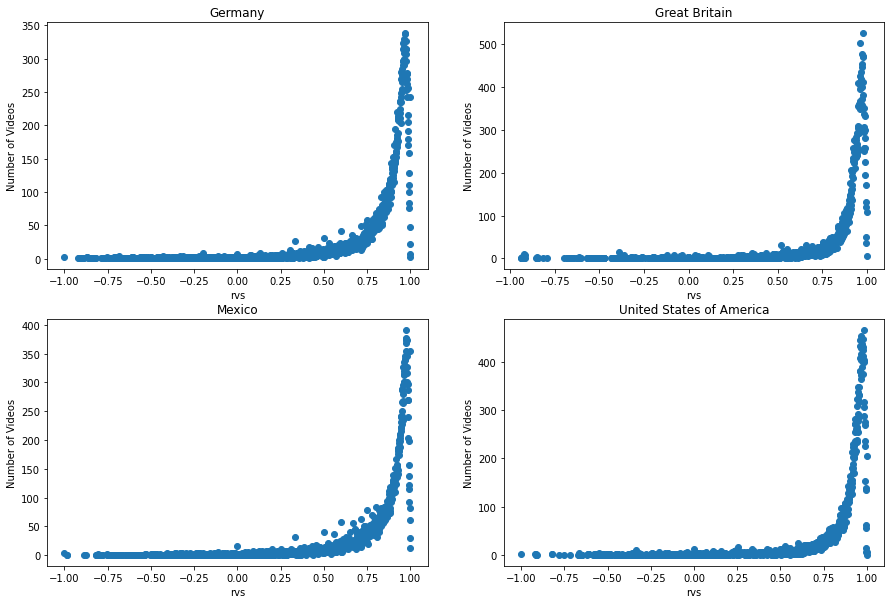

In [ ]:
title_label=['Germany','Great Britain','Mexico','United States of America']

plt.figure(figsize=(15,10))

index_=1

for crvsc in crvs_per_country:

  plt.subplot(2,2,index_)
  plt.scatter(crvsc[0],crvsc[1])
  plt.title(title_label[index_-1],  loc='center')
  plt.xlabel("rvs")
  plt.ylabel("Number of Videos") 
  index_+=1 

plt.show()

As first impression, one can see that the trending videos have more likes than dislikes and that a video to become likely get trending has to have a ratio likes to dislikes of about $75\%$

## Metric `rel_relevance`: `comment_count`/(`likes`+`dislikes`)

It is fair to assume that it takes more effort to comment a video than like or dislike a video. It is also fair to assume that video will become more commented when either the viewer has something to tell about the topic of the video or when some other comment has open a controversy.

According to these assumptions if a value for our attribute `rel_relevance` is close to 1 we will assume that we are treating a video that is relevant to its viewers or has been somewhat relevant for its viewers. A value higher than 1 will mark a video highly relevant for its viewers.


In [ ]:
for dt in data_treat:

  dt['rel_relevance']=round((dt['comment_count'])/(dt['likes']+dt['dislikes']),3)

In [ ]:
#Counting values

counts_per_rel_relevance=[]
for dt in data_treat:
  counts_per_rel_relevance.append(dt['rel_relevance'].value_counts())

In [ ]:
#generate a list for the number of times that each element appears per country
rel_relevance_DE =[]
rel_relevance_GB =[]
rel_relevance_MX =[]
rel_relevance_US =[]

rel_relevance_per_country=[rel_relevance_DE,rel_relevance_GB,rel_relevance_MX,rel_relevance_US]

for i in range(4):
  rel_relevance_per_country[i].append(counts_per_rel_relevance[i].index.tolist())
  rel_relevance_per_country[i].append(counts_per_rel_relevance[i].tolist())
  

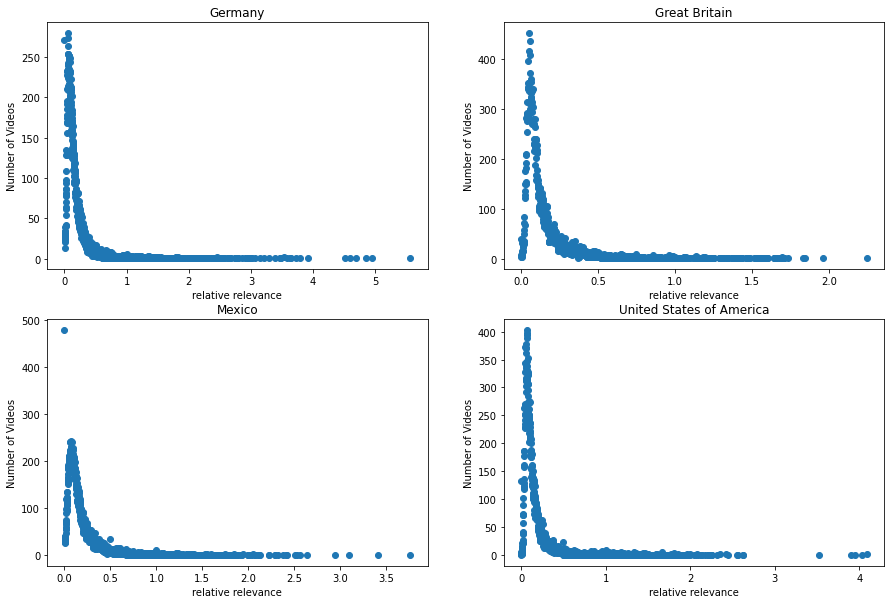

In [ ]:
title_label=['Germany','Great Britain','Mexico','United States of America']

plt.figure(figsize=(15,10))

index_=1

for rel in rel_relevance_per_country:

  plt.subplot(2,2,index_)
  plt.scatter(rel[0],rel[1])
  plt.title(title_label[index_-1],  loc='center')
  plt.xlabel("relative relevance")
  plt.ylabel("Number of Videos") 
  index_+=1 

plt.show()

As we expected most of the data is below 1. Actually most of the trending videos has a ration between likes+dislikes to number of comments bellow 0.5. The peck is about 0.25 and after that the relative relevance decreases rapidly.

## Metric `positive sentiment_engagement`, `positive sentiment_engagement` and `overall sentiment_engagement`: `likes`/`views`, `dislikes`/`views`, (`likes`-`dislikes`)/`views` 

In [ ]:
for dt in data_treat:

  dt['positive sentiment_engagement']=round((dt['likes'])/(dt['views']),3)

In [ ]:
for dt in data_treat:

  dt['negative sentiment_engagement']=round((dt['dislikes'])/(dt['views']),3)

In [ ]:
for dt in data_treat:

  dt['overall_sentiment_engagement']=round((dt['likes']-dt['dislikes'])/(dt['views']),3)

In [ ]:
#Counting values positives

counts_per_poseng=[]
for dt in data_treat:
  counts_per_poseng.append(dt['positive sentiment_engagement'].value_counts())

In [ ]:
#Counting values negatives

counts_per_negeng=[]
for dt in data_treat:
  counts_per_negeng.append(dt['negative sentiment_engagement'].value_counts())

In [ ]:
#Counting values negatives

counts_per_oveng=[]
for dt in data_treat:
  counts_per_oveng.append(dt['overall_sentiment_engagement'].value_counts())

In [ ]:
#generate a list for the number of times that each element appears per country
poseng_DE =[]
poseng_GB =[]
poseng_MX =[]
poseng_US =[]

poseng_per_country=[poseng_DE,poseng_GB,poseng_MX,poseng_US]

for i in range(4):
  poseng_per_country[i].append(counts_per_poseng[i].index.tolist())
  poseng_per_country[i].append(counts_per_poseng[i].tolist())
  

In [ ]:
#generate a list for the number of times that each element appears per country
negeng_DE =[]
negeng_GB =[]
negeng_MX =[]
negeng_US =[]

negeng_per_country=[negeng_DE,negeng_GB,negeng_MX,negeng_US]

for i in range(4):
  negeng_per_country[i].append(counts_per_negeng[i].index.tolist())
  negeng_per_country[i].append(counts_per_negeng[i].tolist())
  

In [ ]:
#generate a list for the number of times that each element appears per country
oveng_DE =[]
oveng_GB =[]
oveng_MX =[]
oveng_US =[]

oveng_per_country=[oveng_DE,oveng_GB,oveng_MX,oveng_US]

for i in range(4):
  oveng_per_country[i].append(counts_per_oveng[i].index.tolist())
  oveng_per_country[i].append(counts_per_oveng[i].tolist())
  

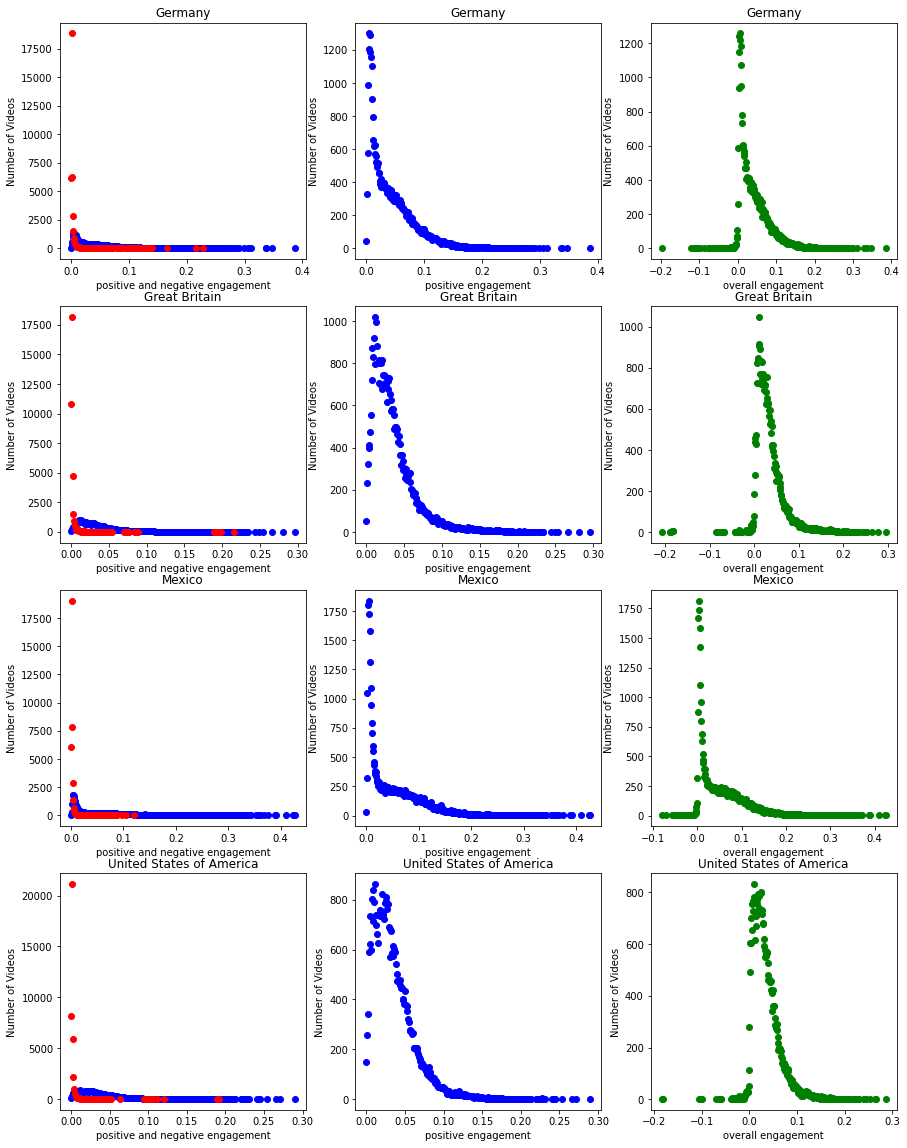

In [ ]:
title_label=['Germany','Great Britain','Mexico','United States of America']

plt.figure(figsize=(15,20))

index_=1
counter=0

for i in range(4):

  plt.subplot(4,3,index_)
  plt.scatter(poseng_per_country[i][0],poseng_per_country[i][1],color='b')
  plt.scatter(negeng_per_country[i][0],negeng_per_country[i][1],color='r')
  plt.title(title_label[counter],  loc='center')
  plt.xlabel("positive and negative engagement")
  plt.ylabel("Number of Videos") 
  index_+=1

  plt.subplot(4,3,index_)
  plt.scatter(poseng_per_country[i][0],poseng_per_country[i][1],color='b')
  plt.title(title_label[counter],  loc='center')
  plt.xlabel("positive engagement")
  plt.ylabel("Number of Videos")  
  index_+=1

  plt.subplot(4,3,index_)
  plt.scatter(oveng_per_country[i][0],oveng_per_country[i][1],color='g')
  plt.title(title_label[counter],  loc='center')
  plt.xlabel("overall engagement")
  plt.ylabel("Number of Videos")  
  index_+=1

  counter+=1
plt.show()

It is clear from the data that the tendency for all the country is that $>75\%$ of the trending videos are in the range of [0-10%] rvs (likes-dislikes) compared to the views.

In [ ]:
#saving data
temporal_data = open("/content/drive/MyDrive/Data_sets/YOUTUBE/data_treat_temp_25_12", "wb")
pickle.dump(data_treat,temporal_data)
temporal_data.close()

## Power transformation and descriptive statistics for the metrics

### Power transformation

#### Box Plots and windows of normal distributed data

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


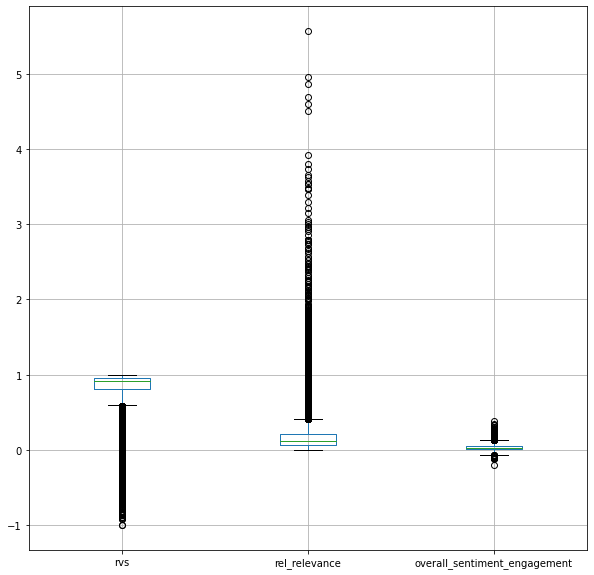

In [ ]:
plt.figure(figsize=(10,10))

data_treat[0].boxplot(column=['rvs', 'rel_relevance', 'overall_sentiment_engagement'])

plt.show()

The box plots are used to creat windows of data which preserve about $90\%$ of the data while getting atributes that follow a normal distrinution. We are "removing" outliers.

##### Checking `rvs`

In [ ]:
#data presrved
for i in range(4):
  print(round(len(data_treat[i]['rvs'][data_treat[i]['rvs']>data_treat[i]['rvs'].quantile(0.08)])/len(data_treat[i]['rvs']),2))

0.92
0.92
0.92
0.92


In [ ]:
#relative difference between mean and meadian

for i in range(4):
  m=np.mean(data_treat[i]['rvs'][data_treat[i]['rvs']>data_treat[i]['rvs'].quantile(0.08)])
  med=np.median(data_treat[i]['rvs'][data_treat[i]['rvs']>data_treat[i]['rvs'].quantile(0.08)])

  val = [m,med]

  print(round(1-min(val)/max(val),2))

0.04
0.02
0.04
0.03


In [ ]:
#Excess kurtosis and skwewness Test

country=['Germany', 'Great britain', 'Mexico', 'United States of America']


for i in range(4):

  x=data_treat[i]['rvs'][data_treat[i]['rvs']>data_treat[i]['rvs'].quantile(0.08)]

  
  print( 'excess kurtosis for {} (should be 0, from -2 to +2 acceptable): {}'.format(country[i], round(kurtosis(x),2) ))
  print( 'skewness for {} (should be 0, from -0.8 to -0.8): {}'.format(country[i], round(skew(x),2) ))


excess kurtosis for Germany (should be 0, from -2 to +2 acceptable): 1.21
skewness for Germany (should be 0, from -0.8 to -0.8): -1.36
excess kurtosis for Great britain (should be 0, from -2 to +2 acceptable): 1.96
skewness for Great britain (should be 0, from -0.8 to -0.8): -1.49
excess kurtosis for Mexico (should be 0, from -2 to +2 acceptable): 0.93
skewness for Mexico (should be 0, from -0.8 to -0.8): -1.3
excess kurtosis for United States of America (should be 0, from -2 to +2 acceptable): 1.76
skewness for United States of America (should be 0, from -0.8 to -0.8): -1.49


In [ ]:
country=['Germany','Great Britain', 'Mexico', 'United States of America']
for j in range(4):

  print(country)
  x=data_treat[j]['rvs'][data_treat[j]['rvs']>data_treat[j]['rvs'].quantile(0.1)]

  result = anderson(x)
  print('Statistic: %.3f' % result.statistic)
  p = 0
  for i in range(len(result.critical_values)):
	  sl, cv = result.significance_level[i], result.critical_values[i]
	  if result.statistic < result.critical_values[i]:
		  print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	  else:
		  print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

['Germany', 'Great Britain', 'Mexico', 'United States of America']
Statistic: 1505.366
15.000: 0.576, data does not look normal (reject H0)
10.000: 0.656, data does not look normal (reject H0)
5.000: 0.787, data does not look normal (reject H0)
2.500: 0.918, data does not look normal (reject H0)
1.000: 1.092, data does not look normal (reject H0)
['Germany', 'Great Britain', 'Mexico', 'United States of America']
Statistic: 1269.433
15.000: 0.576, data does not look normal (reject H0)
10.000: 0.656, data does not look normal (reject H0)
5.000: 0.787, data does not look normal (reject H0)
2.500: 0.918, data does not look normal (reject H0)
1.000: 1.092, data does not look normal (reject H0)
['Germany', 'Great Britain', 'Mexico', 'United States of America']
Statistic: 1717.138
15.000: 0.576, data does not look normal (reject H0)
10.000: 0.656, data does not look normal (reject H0)
5.000: 0.787, data does not look normal (reject H0)
2.500: 0.918, data does not look normal (reject H0)
1.000

* While running Anderson test one has to keep in mind that: The Anderson-Darling test, while having excellent theoretical properties, has a serious flaw when applied to real world data.  The Anderson-Darling test is severely affected by ties in the data due to poor precision.  When a significant number of ties exist (as in our case), the Anderson-Darling will frequently reject the data as non-normal, regardless of how well the data fits the normal distribution.

* By removing the data bellow the $8\%$ "quartle", we preserve $92\%$ of the data and our data becomes normal-like distributed (according to excess kurtosis value). However the skewness value is too big even considereing smaller windows than the one used.

* Therefore the distribution of the  calculated data `can not be consider normal-like`

##### Checking `rel_relevance`

In [ ]:
#data presrved
for i in range(4):
  print(round(len(data_treat[i]['rel_relevance'][data_treat[i]['rel_relevance']<data_treat[i]['rel_relevance'].quantile(0.92)])/len(data_treat[i]['rel_relevance']),2))

0.92
0.92
0.92
0.92


In [ ]:
#relative difference between mean and meadian

for i in range(4):
  m=np.mean(data_treat[i]['rel_relevance'][data_treat[i]['rel_relevance']<data_treat[i]['rel_relevance'].quantile(0.92)])
  med=np.median(data_treat[i]['rel_relevance'][data_treat[i]['rel_relevance']<data_treat[i]['rel_relevance'].quantile(0.92)])

  val = [m,med]

  print(round(1-min(val)/max(val),2))

0.18
0.21
0.18
0.16


In [ ]:
#kurtosis and skewness Test

country=['Germany','Great Britain', 'Mexico', 'United States of America']

for i in range(4):

  x=data_treat[i]['rel_relevance'][data_treat[i]['rel_relevance']<data_treat[i]['rel_relevance'].quantile(0.92)]

  
  print( 'excess kurtosis for {} (should be 0, from -2 to +2 acceptable): {}'.format(country[i], round(kurtosis(x),2) ))
  print( 'skewness for {} (should be 0, from -0.8 to -0.8): {}'.format(country[i], round(skew(x),2) ))

excess kurtosis for Germany (should be 0, from -2 to +2 acceptable): 0.59
skewness for Germany (should be 0, from -0.8 to -0.8): 1.06
excess kurtosis for Great Britain (should be 0, from -2 to +2 acceptable): 1.38
skewness for Great Britain (should be 0, from -0.8 to -0.8): 1.35
excess kurtosis for Mexico (should be 0, from -2 to +2 acceptable): 0.52
skewness for Mexico (should be 0, from -0.8 to -0.8): 1.03
excess kurtosis for United States of America (should be 0, from -2 to +2 acceptable): 0.95
skewness for United States of America (should be 0, from -0.8 to -0.8): 1.17


In [ ]:
x=data_treat[0]['rel_relevance'][data_treat[0]['rel_relevance']<data_treat[0]['rel_relevance'].quantile(0.92)]

result = anderson(x)
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 995.587
15.000: 0.576, data does not look normal (reject H0)
10.000: 0.656, data does not look normal (reject H0)
5.000: 0.787, data does not look normal (reject H0)
2.500: 0.918, data does not look normal (reject H0)
1.000: 1.092, data does not look normal (reject H0)


* By following the same criteria than the one use don the former point, the distribution of the calculated data can not be consider normal

##### Checking `overall_sentiment_engagement`

In [ ]:
#adjust quantile to preserve above 90% of the data


name='overall_sentiment_engagement'
country=['Germany','Great Britain', 'Mexico', 'United States of America']

for i,dt in enumerate(data_treat):
  lower = dt[name].quantile(0.05)
  higher = dt[name].quantile(0.96)

  x=dt.loc[(dt[name]>=lower) & (dt[name]<= higher),name]
  y=dt[name]

  print(country[i])
  print(round(len(x)/len(y),2))


Germany
0.93
Great Britain
0.91
Mexico
0.92
United States of America
0.91


In [ ]:
#relative difference between mean and meadian

name='overall_sentiment_engagement'
country=['Germany','Great Britain', 'Mexico', 'United States of America']

for i,dt in enumerate(data_treat):

  lower = dt[name].quantile(0.05)
  higher = dt[name].quantile(0.96)

  x=dt.loc[(dt[name]>=lower) & (dt[name]<= higher),name]

  m=np.mean(x)
  med=np.median(x)

  val = [m,med]

  print(country[i])
  print(round(1-min(val)/max(val),2))

Germany
0.23
Great Britain
0.14
Mexico
0.32
United States of America
0.14


In [ ]:
#kurtosis and skewness Test

name='overall_sentiment_engagement'
country=['Germany','Great Britain', 'Mexico', 'United States of America']

for i,dt in enumerate(data_treat):

  lower = dt[name].quantile(0.05)
  higher = dt[name].quantile(0.96)

  x=dt.loc[(dt[name]>=lower) & (dt[name]<= higher),name]

  
  print( 'excess kurtosis for {} (should be 0, from -2 to +2 acceptable): {}'.format(country[i], round(kurtosis(x),2) ))
  print( 'skewness for {} (should be 0, from -0.8 to -0.8): {}'.format(country[i], round(skew(x),2) ))

excess kurtosis for Germany (should be 0, from -2 to +2 acceptable): -0.18
skewness for Germany (should be 0, from -0.8 to -0.8): 0.87
excess kurtosis for Great Britain (should be 0, from -2 to +2 acceptable): 0.32
skewness for Great Britain (should be 0, from -0.8 to -0.8): 0.93
excess kurtosis for Mexico (should be 0, from -2 to +2 acceptable): -0.38
skewness for Mexico (should be 0, from -0.8 to -0.8): 0.85
excess kurtosis for United States of America (should be 0, from -2 to +2 acceptable): -0.16
skewness for United States of America (should be 0, from -0.8 to -0.8): 0.73


In this case, the values for skewness and kurtosis are acceptable for some data. However, the relative difference between the median and the average i higher than $5\%$ which means that the data is too spread. Therefore, we wil also `not` consider the distribution of this data as normal-like.

#### Power Transformation of `views`,`likes`,`dislikes`,`comment_count` and metrics







In [ ]:
#Select data

original_data=[]
names=['views','likes','dislikes','comment_count','rvs','rel_relevance','overall_sentiment_engagement']

for dt in data_treat:

  x=dt[names]

  original_data.append(x)

In [ ]:
# transform and save data &  lambda value 

fitted_data = []
fitted_lambda = {}

names=['views','likes','dislikes','comment_count','rvs','rel_relevance','overall_sentiment_engagement']
names_fitted=['fviews','flikes','fdislikes','fcomment_count','frvs','frel_rel','foverall_sen_eng']
country=['Germany','Great Britain','Mexico','United States of America']

for j,odata in enumerate(original_data):

  lambda_list= []

  for i,col in enumerate(names):
    
    fdata, lambda_val = stats.yeojohnson(odata.loc[:,col])

    odata[names_fitted[i]]=fdata
    lambda_list.append(lambda_val)
  
  fitted_lambda[country[j]]=lambda_list
  


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


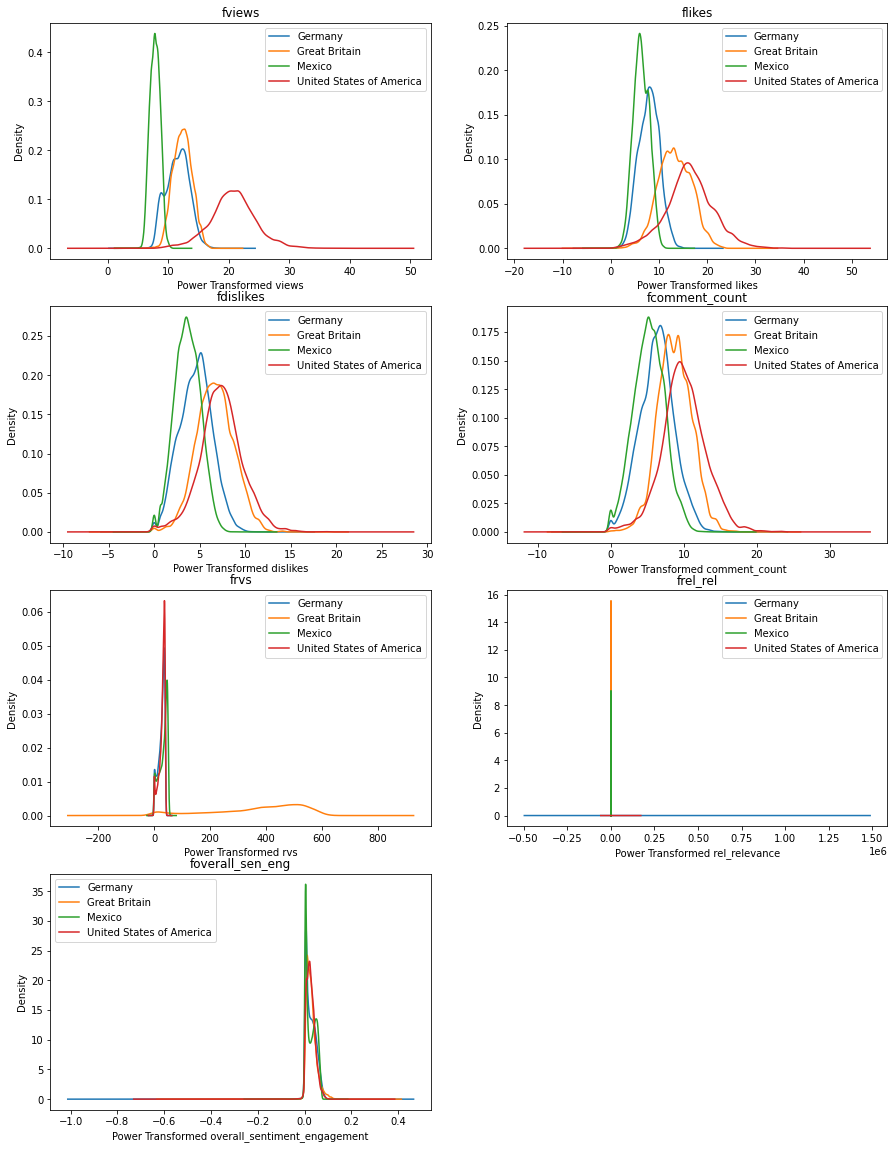

In [ ]:

country=['Germany','Great Britain','Mexico','United States of America']
names=['fviews','flikes','fdislikes','fcomment_count','frvs','frel_rel','foverall_sen_eng']
names_=['views','likes','dislikes','comment_count','rvs','rel_relevance','overall_sentiment_engagement']


fig, ax = plt.subplots(figsize=(15,20))

counter = 1

for j,name in enumerate(names):

  ax = plt.subplot(4, 2, counter)


  for i,data in enumerate(original_data):
    ax=data[name].plot.kde(label=country[i])

  leg = ax.legend();
  plt.title(name,  loc='center')
  plt.xlabel('Power Transformed '+names_[j])
  
  counter+=1

plt.show()

In general, the power transformation seems to work better with the raw data

#### Normality on Power transformation data

In [ ]:
#dedife a function to check for normal distributed data

def normal_check(data):

  #empty list

  l=[]

  #Checking desviation

  m=np.mean(data)

  m=0.000001 if m == 0 else  m

  med=np.median(data)
  med=0.000001 if med == 0 else  med
  

  val = [m,med]

  per=round(1-min(val)/max(val),2)

  desv = 1 if per <= 0.05 else 0

  l.append(desv)

  #Checking kurtosis
  kurt_val = round(kurtosis(data),2)
  
  kurt = 1 if 2 > kurt_val > -2 else  0

  l.append(kurt)


  #Checking skewness

  skew_val= round(skew(data),2)

  sk = 1 if 0.8 > skew_val > -0.8 else  0

  l.append(sk)

  l=sum(l)

  result = 1 if l>2 else 0


  return(result)




In [ ]:
Normality_test={}
country=['Germany','Great Britain','Mexico','United States of America']
names=['views','likes','dislikes','comment_count','rvs','rel_relevance','overall_sentiment_engagement','fviews','flikes','fdislikes','fcomment_count','frvs','frel_rel','foverall_sen_eng']

for i,key in enumerate(country):

  temp_list=[]

  for name in names:

    temp_list.append(normal_check(original_data[i][name]))

  Normality_test[key]= temp_list





In [ ]:
test_normality = pd.DataFrame.from_dict(Normality_test, orient='index',columns=names)

In [ ]:
test_normality.head()

,views,likes,dislikes,comment_count,rvs,rel_relevance,overall_sentiment_engagement,fviews,flikes,fdislikes,fcomment_count,frvs,frel_rel,foverall_sen_eng
Germany,0,0,0,0,0,0,0,1,1,1,1,0,0,0
Great Britain,0,0,0,0,0,0,0,1,1,1,1,0,0,0
Mexico,0,0,0,0,0,0,0,1,1,1,1,0,1,0
United States of America,0,0,0,0,0,0,0,1,1,1,1,0,0,0


Now we can confirn that the transformed raw data can become normal trough a  Yeo-Johnson transformation

In [ ]:
#Put all the data together

names=original_data[0].iloc[:,7:].columns

for i,data in enumerate(original_data):

  for name in names:

    data_treat[i][name]=data[name]



In [ ]:
#We drop the last three rows since they will not be used

for i,data in enumerate(data_treat):
  data_treat[i]=data.iloc[:,:-3]

In [ ]:
data_treat[1].head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,description,rvs,rel_relevance,positive sentiment_engagement,negative sentiment_engagement,overall_sentiment_engagement,title_polarity,title_subjectivity,fviews,flikes,fdislikes,fcomment_count
0,Jw1Y-zhQURU,2017-11-14,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,26,2017-11-10 00:00:00,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,9479,https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,Click here to continue the story and make your...,0.689,0.144,0.008,0.001,0.006,0.000000,0.0,13.947646,14.507156,9.126737,10.341287
1,3s1rvMFUweQ,2017-11-14,Taylor Swift: â¦Ready for It? (Live) - SNL,Saturday Night Live,24,2017-11-12 00:00:00,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1053632,25561,2294,2757,https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg,Musical guest Taylor Swift performs â¦Ready f...,0.835,0.099,0.024,0.002,0.022,0.136364,0.5,12.430723,13.193637,7.662484,8.798951
2,n1WpP7iowLc,2017-11-14,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10 00:00:00,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787420,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,Eminem's new track Walk on Water ft. Beyoncé i...,0.895,0.152,0.046,0.003,0.043,0.000000,0.0,14.614070,19.376522,10.534328,13.737209
3,PUTEiSjKwJU,2017-11-14,Goals from Salford City vs Class of 92 and Fri...,Salford City Football Club,17,2017-11-13 00:00:00,"Salford City FC|""Salford City""|""Salford""|""Clas...",27833,193,12,37,https://i.ytimg.com/vi/PUTEiSjKwJU/default.jpg,Salford drew 4-4 against the Class of 92 and F...,0.883,0.180,0.007,0.000,0.007,0.000000,0.0,9.436510,6.020573,2.556563,3.815499
4,rHwDegptbI4,2017-11-14,Dashcam captures truck's near miss with child ...,Cute Girl Videos,25,2017-11-13 00:00:00,[none],9815,30,2,30,https://i.ytimg.com/vi/rHwDegptbI4/default.jpg,Dashcam captures truck's near miss with child ...,0.875,0.938,0.003,0.000,0.003,0.100000,0.4,8.544921,3.743946,1.097072,3.592257


## Correlations

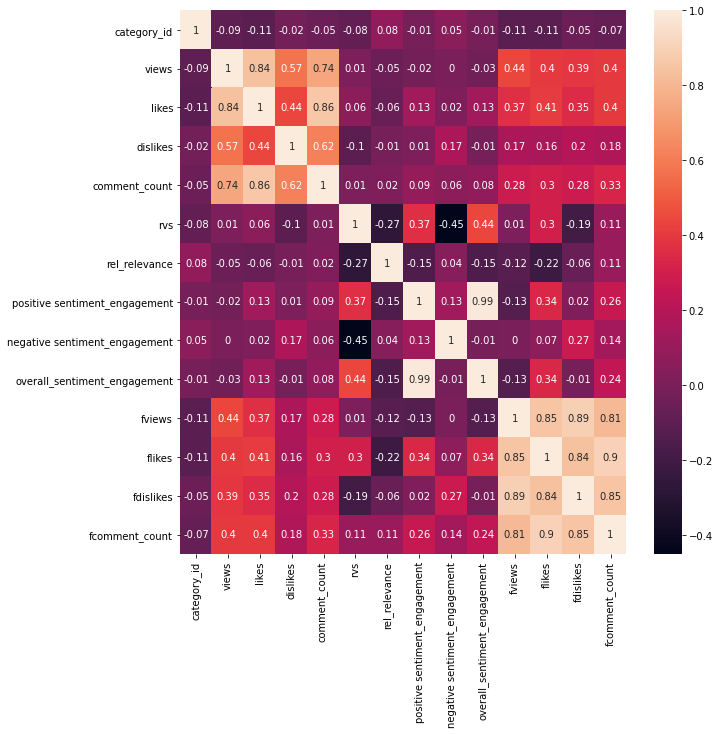

In [ ]:


plt.figure(figsize=(10,10))
corrMatrix = round(data_treat[0].corr(),2)
sns.heatmap(corrMatrix, annot=True)
plt.show()



It stands out the correlation difference between the raw data with itself and the power transformed data with itself. On the last group the correlation is higher than on the first group.

In [ ]:

temporal_data = open("/content/drive/MyDrive/Data_sets/YOUTUBE/data_treat_temp_22_12", "wb")

pickle.dump(data_treat,temporal_data)
temporal_data.close()

In [ ]:
#read

temporal_data = open("/content/drive/MyDrive/Data_sets/YOUTUBE/data_treat_temp_21_12", "rb")

data_treat=pickle.load(temporal_data)

#### Quantile Transformation of on defined metrics

In [ ]:
#Select data

original_data=[]
names=['rvs','rel_relevance','overall_sentiment_engagement']

for dt in data_treat:

  x=dt[names]

  original_data.append(x)

In [ ]:
# transform and save data &  lambda value 

fitted_data = []
fitted_lambda = {}

names=['rvs','rel_relevance','overall_sentiment_engagement']
names_fitted=['q_rvs','q_rel_rel','q_overall_sen_eng']
country=['Germany','Great Britain','Mexico','United States of America']

p=QuantileTransformer(output_distribution='normal')

for j,odata in enumerate(original_data):

  

  for i,col in enumerate(names):

    temp_array=np.empty(len(odata.loc[:,col]))

    temp_array=odata.loc[:,col].to_numpy()

    temp_array = temp_array.reshape((len(temp_array),1))
    
    fdata = p.fit_transform(temp_array)    

    original_data[j][names_fitted[i]]=fdata
    
  
  

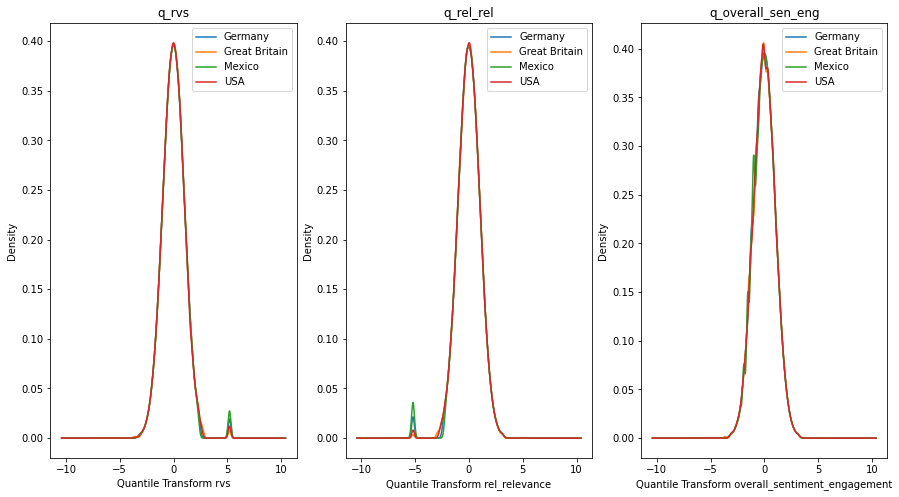

In [ ]:
country=['Germany','Great Britain','Mexico','USA']
names=['q_rvs','q_rel_rel','q_overall_sen_eng']
names_=['rvs','rel_relevance','overall_sentiment_engagement']


fig, ax = plt.subplots(figsize=(15,8))

counter = 1

for j,name in enumerate(names):

  ax = plt.subplot(1, 3, counter)


  for i,data in enumerate(original_data):
    ax=data[name].plot.kde(label=country[i])

  leg = ax.legend(loc=1);
  plt.title(name,  loc='center')
  plt.xlabel('Quantile Transform '+names_[j])
  
  counter+=1

plt.show()

In [ ]:
#Check for verification of normal distributed data

Normality_test={}
country=['Germany','Great Britain','Mexico','United States of America']
names=['q_rvs','q_rel_rel','q_overall_sen_eng']

for i,key in enumerate(country):

  temp_list=[]

  for name in names:

    temp_list.append(normal_check(original_data[i][name]))

  Normality_test[key]= temp_list

In [ ]:
test_normality = pd.DataFrame.from_dict(Normality_test, orient='index',columns=names)

In [ ]:
test_normality #one values mean "normal-like" distributed data 

,q_rvs,q_rel_rel,q_overall_sen_eng
Germany,0,0,1
Great Britain,0,0,1
Mexico,0,0,1
United States of America,0,0,1


In [ ]:
#Check for Mexico

#we change the condition on the if statement to chech for a wrong selection of parameter and swap 0.00001 to -0.001

data=original_data[2]['q_overall_sen_eng']
  #Checking desviation

m=np.mean(data)

m=-0.001 if m == 0 else  m

med=np.median(data)
med=-0.001 if med == 0 else  med
  

val = [m,med]

per=round(1-min(val)/max(val),2)

print(per)

#since we can tune the result adjusting an aribitray parameter we consider only kurtosis and skewness

-0.54


In [ ]:
kurt_val = round(kurtosis(data),2)

print(kurt_val)

skew_val= round(skew(data),2)

print(skew_val)

-0.05
0.02


we can consider the column `q_overall_sen_eng` form Mexico as `Normal-like` distributed

In [ ]:
# Place the column in our dataset

names=['q_overall_sen_eng']

for i, data in enumerate(data_treat):

  data_treat[i] = data.join(original_data[i][names])

Save the data

In [ ]:
temporal_data = open("/content/drive/MyDrive/Data_sets/YOUTUBE/data_treat_temp_02_01_part3", "wb")

pickle.dump(data_treat,temporal_data)
temporal_data.close()

Look correlations again

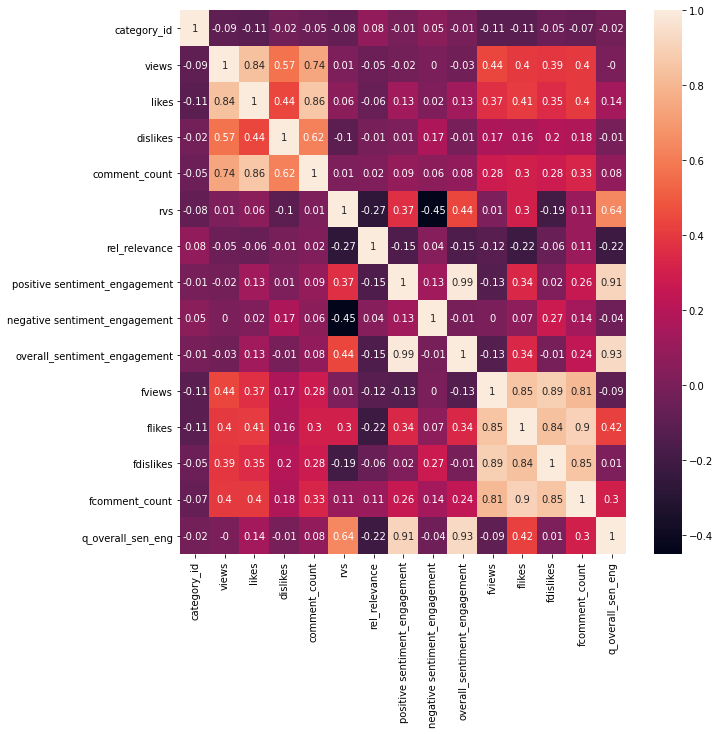

In [ ]:
plt.figure(figsize=(10,10))
corrMatrix = round(data_treat[0].corr(),2)
sns.heatmap(corrMatrix, annot=True)
plt.show()

## Conclusions

* We have find some metrics which allow to stract some preliminar information.
* Raw data is not normal.
* We could normalize the row data through a Power Transformation.
* Only the metric `overall_sentiment_engagement` can be normalize trough a quantile transformation
* It is remarkable that trendinding more than $90\%$ videos are in the region $50\%$ and $60\%-40\%$ split between likes and dislikes


# How long does it take for a Video to get trending?

data in dataframe

In [ ]:
for i,data in enumerate(data_treat):

    data_treat[i]['time_delta']= pd.to_timedelta(data.loc[:,'trending_date']-data.loc[:,'publish_time']).dt.days


/usr/local/lib/python3.6/dist-packages/pandas/core/arrays/datetimelike.py:1345: PerformanceWarning: Adding/subtracting object-dtype array to DatetimeArray not vectorized
  PerformanceWarning,


In [ ]:
#checking for wrong data
for data in data_treat:

  print(data['time_delta'][data['time_delta'] < 0 ].count()) 

0
0
0
0


## Density plot for time deltas

/usr/local/lib/python3.6/dist-packages/pandas/core/arrays/datetimelike.py:1345: PerformanceWarning: Adding/subtracting object-dtype array to DatetimeArray not vectorized
  PerformanceWarning,
/usr/local/lib/python3.6/dist-packages/pandas/core/arrays/datetimelike.py:1345: PerformanceWarning: Adding/subtracting object-dtype array to DatetimeArray not vectorized
  PerformanceWarning,
/usr/local/lib/python3.6/dist-packages/pandas/core/arrays/datetimelike.py:1345: PerformanceWarning: Adding/subtracting object-dtype array to DatetimeArray not vectorized
  PerformanceWarning,
/usr/local/lib/python3.6/dist-packages/pandas/core/arrays/datetimelike.py:1345: PerformanceWarning: Adding/subtracting object-dtype array to DatetimeArray not vectorized
  PerformanceWarning,


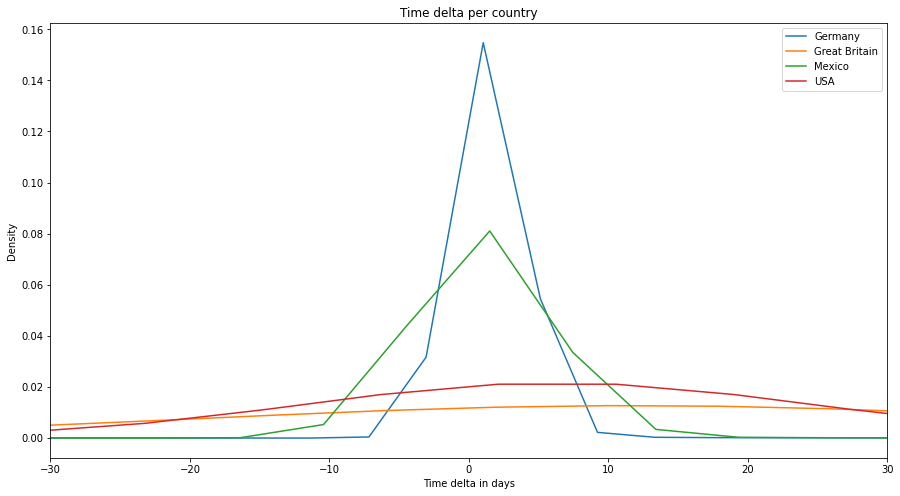

In [ ]:



fig, ax = plt.subplots(figsize=(15,8))

counter = 1

country=['Germany','Great Britain','Mexico','USA']

for i,data in enumerate(data_treat):

    my_time_delta= pd.to_timedelta(data.loc[:,'trending_date']-data.loc[:,'publish_time']).dt.days

    ax=my_time_delta.plot.kde(label=country[i])

leg = ax.legend();
plt.title('Time delta per country',  loc='center')
plt.xlabel('Time delta in days')
plt.xlim((-30,30))
  


plt.show()

## Plot Number of occurrences

In [ ]:
#Counting values

counts_per_delta=[]
for dt in data_treat:
  counts_per_delta.append(dt['time_delta'].value_counts())

In [ ]:
#generate a list for the number of times that each element appears per country
time_delta_DE =[]
time_delta_GB =[]
time_delta_MX =[]
time_delta_US =[]

time_delta_per_country=[time_delta_DE,time_delta_GB,time_delta_MX,time_delta_US]

for i in range(4):
  time_delta_per_country[i].append(counts_per_delta[i].index.tolist())
  time_delta_per_country[i].append(counts_per_delta[i].tolist())
  

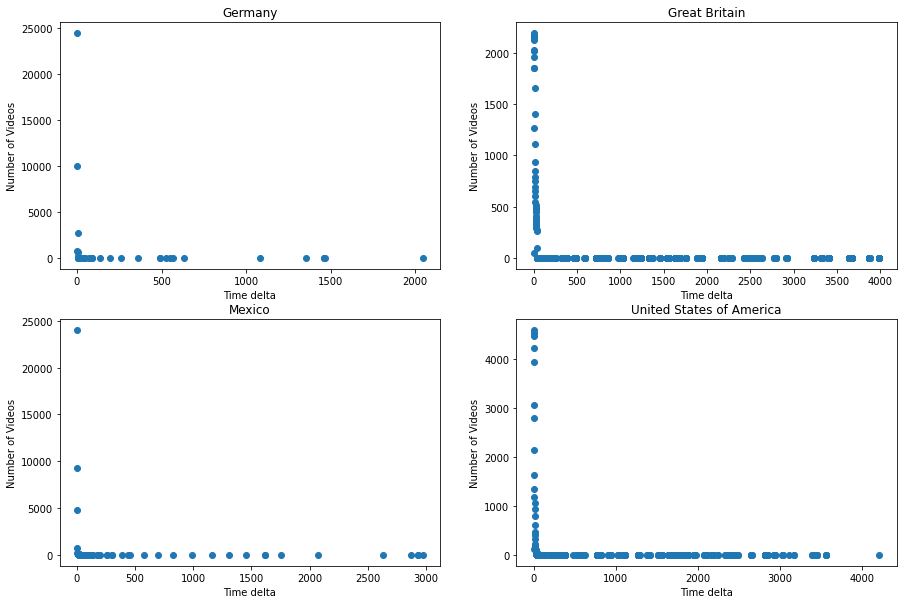

In [ ]:
title_label=['Germany','Great Britain','Mexico','United States of America']

plt.figure(figsize=(15,10))

index_=1

for rel in time_delta_per_country:

  plt.subplot(2,2,index_)
  plt.scatter(rel[0],rel[1])
  plt.title(title_label[index_-1],  loc='center')
  plt.xlabel("Time delta")
  plt.ylabel("Number of Videos") 
  index_+=1 

plt.show()

## Percent of number of videos becoming popular with time

In [ ]:
#checking for the percent of videos that become trending in at least 30 days

times=[0,1,2,5,7,10,15,30]

times_list=[]

for data in data_treat:

  time_list_temp=[]

  for i, time in enumerate(times):
    try:
      x=(data['time_delta'][(data['time_delta']>=time) & (data['time_delta'] < (times[i+1])) ].count())/(len(data['time_delta']))

      x=round(x*100,2)

      
  
      time_list_temp.append(x)
    except:
      
      pass
  
  times_list.append(time_list_temp)


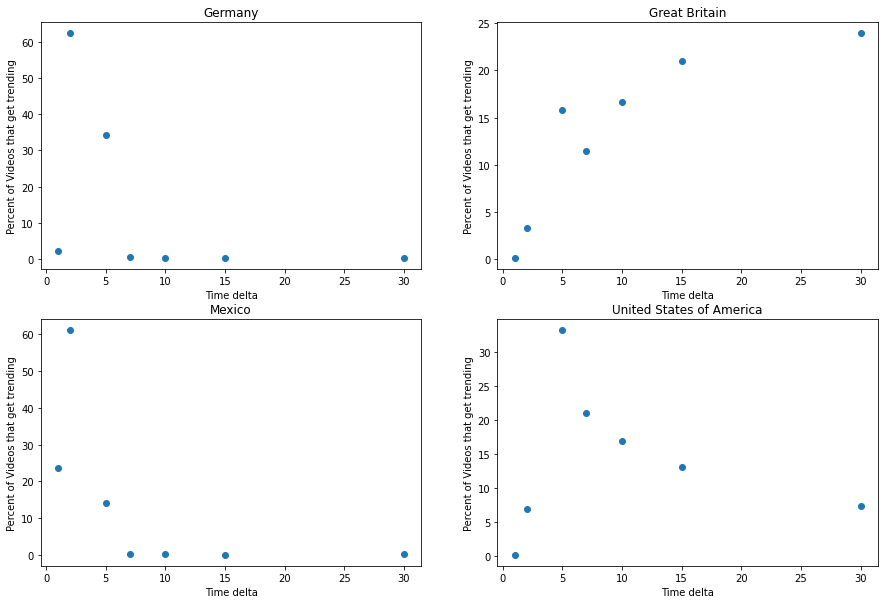

In [ ]:
title_label=['Germany','Great Britain','Mexico','United States of America']
times=[0,1,2,5,7,10,15,30]

plt.figure(figsize=(15,10))

index_=1

for tm in times_list:

  plt.subplot(2,2,index_)
  plt.scatter(times[1:],tm)
  plt.title(title_label[index_-1],  loc='center')
  plt.xlabel("Time delta")
  plt.ylabel("Percent of Videos that get trending") 
  index_+=1 

plt.show()

The data ploted represents $+98\%$ of the total videos

This results are quite interesting becouse they may be talking about how long takes something on becoming popular in a country, howlong take knew on spread or how often the people checks the plataform or how long does it take for a user to view something outside of its regular interest.

Due to this findings, We will consider as outlier any video that takes more than 30+10 days to get trending and we will calculate the amount of data lost in %.

In [ ]:
#check for the percent of information lost

for data in data_treat:

  x= (data['time_delta'][data['time_delta']<=40].count())/len(data['time_delta'])
  x=round(100-(x*100),2)
  print(x)

0.05
1.67
0.1
0.8


In [ ]:
#Filtering

for i,data in enumerate(data_treat):

  data_treat[i]=data.loc[data['time_delta']<=40,:]

## Check for normal distribution

In [ ]:
#Check for verification of normal distributed data

Normality_test={}
country=['Germany','Great Britain','Mexico','United States of America']
names=['time_delta']

for i,key in enumerate(country):

  temp_list=[]

  for name in names:

    temp_list.append(normal_check(data_treat[i][name]))

  Normality_test[key]= temp_list

In [ ]:
test_normality = pd.DataFrame.from_dict(Normality_test, orient='index',columns=names)

In [ ]:
test_normality #one values mean "normal-like" distributed data 

,time_delta
Germany,0
Great Britain,0
Mexico,0
United States of America,0


### Power transformation

In [ ]:
# transform and save data &  lambda value 

fitted_data = []
fitted_lambda = {}

names=['time_delta']
names_fitted=['bc_time_delta']
country=['Germany','Great Britain','Mexico','United States of America']

for i,odata in enumerate(data_treat):

    
  fdata, lambda_val = stats.yeojohnson(odata.loc[:,'time_delta'])

  data_treat[i]['bc_time_delta']=fdata
  lambda_list.append(lambda_val)
  

  


In [ ]:
#Since we are getting problems with ceros after power transformation
# We define a new function to check for normal distributed data

def normal_check_reduced(data):

  #empty list

  l=[]


  #Checking kurtosis
  kurt_val = round(kurtosis(data),2)
  
  kurt = 1 if 2 > kurt_val > -2 else  0

  l.append(kurt)


  #Checking skewness

  skew_val= round(skew(data),2)

  sk = 1 if 0.8 > skew_val > -0.8 else  0

  l.append(sk)

  l=sum(l)

  result = 1 if l>1 else 0


  return(result)




In [ ]:
#Check for verification of normal distributed data

Normality_test={}
country=['Germany','Great Britain','Mexico','United States of America']
names=['bc_time_delta']

for i,key in enumerate(country):

  temp_list=[]

  for name in names:

    temp_list.append(normal_check_reduced(data_treat[i][name]))

  Normality_test[key]= temp_list

In [ ]:
test_normality = pd.DataFrame.from_dict(Normality_test, orient='index',columns=names)

In [ ]:
test_normality #one values mean "normal-like" distributed data 

,bc_time_delta
Germany,0
Great Britain,1
Mexico,1
United States of America,1


One has to be carefull with the data from germany since it is not normal

### Quantile transformation

In [ ]:
# transform and save data &  lambda value 

fitted_data = []
fitted_lambda = {}

names=['time_delta']
names_fitted=['q_time_delta']
country=['Germany','Great Britain','Mexico','United States of America']

p=QuantileTransformer(output_distribution='normal')

for j,odata in enumerate(data_treat):

  

  for i,col in enumerate(names):

    temp_array=np.empty(len(odata.loc[:,col]))

    temp_array=odata.loc[:,col].to_numpy()

    temp_array = temp_array.reshape((len(temp_array),1))
    
    fdata = p.fit_transform(temp_array)    

    data_treat[j][names_fitted[i]]=fdata
    
  
  

In [ ]:
#Check for verification of normal distributed data

Normality_test={}
country=['Germany','Great Britain','Mexico','United States of America']
names=['q_time_delta']

for i,key in enumerate(country):

  temp_list=[]

  for name in names:

    temp_list.append(normal_check_reduced(data_treat[i][name]))

  Normality_test[key]= temp_list

In [ ]:
test_normality = pd.DataFrame.from_dict(Normality_test, orient='index',columns=names)

In [ ]:
test_normality #one values mean "normal-like" distributed data 

,q_time_delta
Germany,0
Great Britain,1
Mexico,0
United States of America,1


Since the YeoJhonson transformation gives better resutls, the last col is dropped

In [ ]:
for i,data in enumerate(data_treat):

  data_treat[i]=data.iloc[:,:-1]

Save the data

In [ ]:
temporal_data = open("/content/drive/MyDrive/Data_sets/YOUTUBE/data_treat_temp_02_01_part_2", "wb")

pickle.dump(data_treat,temporal_data)
temporal_data.close()

Read data

In [ ]:
temporal_data = open("/content/drive/MyDrive/Data_sets/YOUTUBE/data_treat_temp_25_12", "rb")

data_treat=pickle.load(temporal_data)

temporal_data.close()

# Some NLP

## Further text manuipulation and cleaning

### Dictionaries


In [ ]:
# We are going to change this to key
def combine_text(list_of_text):
    '''Takes a list of text and combines them into one large chunk of text.'''
    combined_text = ' '.join(list_of_text)
    return combined_text

In [ ]:
country=['Germany','Great Britain','Mexico', 'USA']
col=['title','channel_title','tags','description']
titles={}
channel_titles={}
tags={}
descriptions={}

List_of_texts=[titles,channel_titles,tags,descriptions]

for i,lt in enumerate(List_of_texts):

  for j,data in enumerate(data_treat):

    text=data[col[i]].tolist()

    lt[country[j]]=combine_text(text)




### List of Corpus dataframe

In [ ]:
pd.set_option('max_colwidth',100)

col=['title','channel_title','tags','description']

data_title=pd.DataFrame()
data_ch_title=pd.DataFrame()
data_tags=pd.DataFrame()
data_desc=pd.DataFrame()


List_of_txt_frames=[data_title,data_ch_title,data_tags,data_desc]

for i,lf in enumerate(List_of_txt_frames):

  lf = pd.DataFrame.from_dict(List_of_texts[i], orient='index')
  lf.columns = [col[i]]
  
  List_of_txt_frames[i]=lf
  


### More cleaning

In [ ]:
def clean_text_step_1(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', ' ', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    text = re.sub('\w*\d\w*', ' ', text)
    return text

step_1 = lambda x: clean_text_step_1(x)

In [ ]:
List_of_txt_frames[0]=pd.DataFrame(List_of_txt_frames[0].title.apply(step_1))
List_of_txt_frames[1]=pd.DataFrame(List_of_txt_frames[1].channel_title.apply(step_1))
List_of_txt_frames[2]=pd.DataFrame(List_of_txt_frames[2].tags.apply(step_1))
List_of_txt_frames[3]=pd.DataFrame(List_of_txt_frames[3].description.apply(step_1))

In [ ]:
#Some more cleaning

def clean_text_step_2(text):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    text = re.sub('[‘’“”…]', ' ', text)
    text = re.sub('\n', ' ', text)
    return text

step_2 = lambda x: clean_text_step_2(x)

In [ ]:
List_of_txt_frames[0]=pd.DataFrame(List_of_txt_frames[0].title.apply(step_2))
List_of_txt_frames[1]=pd.DataFrame(List_of_txt_frames[1].channel_title.apply(step_2))
List_of_txt_frames[2]=pd.DataFrame(List_of_txt_frames[2].tags.apply(step_2))
List_of_txt_frames[3]=pd.DataFrame(List_of_txt_frames[3].description.apply(step_2))

In [ ]:
#Some more cleaning

def clean_text_step_3(text):
    '''Get rid of too long words'''
    longword = re.compile(r'\W*\b\w{25,200}\b')
    text = longword.sub('', text)
    return text

step_3 = lambda x: clean_text_step_3(x)



In [ ]:
List_of_txt_frames[0]=pd.DataFrame(List_of_txt_frames[0].title.apply(step_3))
List_of_txt_frames[1]=pd.DataFrame(List_of_txt_frames[1].channel_title.apply(step_3))
List_of_txt_frames[2]=pd.DataFrame(List_of_txt_frames[2].tags.apply(step_3))
List_of_txt_frames[3]=pd.DataFrame(List_of_txt_frames[3].description.apply(step_3))

In [ ]:
temporal_data = open("/content/drive/MyDrive/Data_sets/YOUTUBE/List_of_text_temp_02_01", "wb")

pickle.dump(List_of_txt_frames,temporal_data)
temporal_data.close()

### Document-Term Matrix

In [ ]:
# We are going to create a document-term matrix using CountVectorizer, and exclude common English stop words
from sklearn.feature_extraction.text import CountVectorizer

#Since our dataframe have words on seral languages we will detect stop-words bia frequency

cv = CountVectorizer(max_df=0.7)



In [ ]:
list_of_dtms=[]

column=['title','channel_title','tags','description']

for i,col in enumerate(column):

  data_cv =cv.fit_transform(List_of_txt_frames[i][col])

  data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())

  data_dtm.index = List_of_txt_frames[i].index

  list_of_dtms.append(data_dtm)

In [ ]:
list_of_dtms[0]

,aa,aaa,aachen,aadhi,aado,aala,aalen,aaliyah,aaliyahjay,aan,aanand,aangan,aar,aarón,aastha,aatrox,aayirathil,ab,abailarks,abajo,abanderamiento,abandona,abandonada,abandonadas,abandonado,abandonados,abandonadosð,abandonan,abandonar,abandonara,abandono,abandonos,abandonó,abanicos,abarbeiten,abarrota,abarrotan,abarrotes,abasto,abastos,...,žú,žüäžěä,žāôžõź,žāįžüćíįôžěä,žą,žąą,žąėžď,žąėžėīž,žąěūě,žąīžļą,žč,žď,žēäžäēžč,žēąžčúžēą,žēķžĺú,žė,žėīž,žęöž,žě,žěćž,žěćžčěžěą,žěė,žěī,žěīžú,žěīžüī,žěīžčą,žěź,žį,žįúž,žįėžěď,žįīžěľž,žįįžöįžď,žķúžīą,žķúžįľž,žļôíłäžīöíłä,žļõžāėž,žļöžä,žļą,žľąž,žźčž
Germany,0,0,4,2,1,1,1,2,0,1,2,4,1,0,0,1,1,119,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,4,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,30,1,1,1,1,1,1,1,1,1,1,2,1
Great Britain,19,0,0,0,0,0,0,0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Mexico,14,20,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,1,4,1,33,11,5,12,13,1,13,1,1,1,1,4,1,0,1,1,1,2,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
USA,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#saving

temporal_data = open("/content/drive/MyDrive/Data_sets/YOUTUBE/data_dtm_temp_20_12", "wb")

pickle.dump(list_of_dtms,temporal_data)
temporal_data.close()

## Exploratory Analisys.  Has a real menaing our text data or it requires further cleaning?

In [ ]:
data_dtm_trans=[]

for data in list_of_dtms:
  
  data = data.transpose()
  
  data_dtm_trans.append(data)


In [ ]:
# Find the top 50 words that appers the most on the titles for each country
top_title_dict = {}
for c in data_dtm_trans[0].columns:
    top = data_dtm_trans[0][c].sort_values(ascending=False).head(50)
    top_title_dict[c]= list(zip(top.index, top.values))

top_title_dict

{'Germany': [('bölüm', 2510),
  ('mit', 2099),
  ('und', 1813),
  ('ōßŕąō', 1523),
  ('das', 1321),
  ('für', 1208),
  ('auf', 1198),
  ('ŕöō', 1035),
  ('ŕą', 1023),
  ('ist', 981),
  ('ŕąō', 979),
  ('ŕąŕāō', 750),
  ('folge', 692),
  ('ich', 691),
  ('ŗł', 682),
  ('aus', 640),
  ('sat', 627),
  ('vom', 579),
  ('ein', 577),
  ('wie', 512),
  ('nicht', 512),
  ('ōßō', 490),
  ('köln', 469),
  ('deutsch', 428),
  ('teil', 415),
  ('gegen', 402),
  ('dem', 395),
  ('afd', 367),
  ('über', 367),
  ('nacht', 360),
  ('nach', 360),
  ('sie', 355),
  ('ŕä', 355),
  ('fragman', 353),
  ('zum', 344),
  ('tek', 340),
  ('prosieben', 339),
  ('liebe', 336),
  ('es', 335),
  ('ūüē', 334),
  ('eritrean', 328),
  ('ßa', 317),
  ('ŕäō', 316),
  ('fragmanńī', 315),
  ('wird', 312),
  ('par', 310),
  ('sich', 304),
  ('wir', 302),
  ('ŕāō', 290),
  ('neue', 289)],
 'Great Britain': [('tyron', 145),
  ('woodley', 145),
  ('beatdown', 130),
  ('ê³', 125),
  ('dodie', 120),
  ('monáe', 89),
  ('ybn', 

The German (specially) and the great Britain text needs further correction. Particularly, the German data has mainly “stopWords”.
However, the Mexican and the USA data seems to show reasonable results.


In [ ]:
# Find the top 50 words that appers the most on the channel titles for each country
top_chn_title_dict = {}
for c in data_dtm_trans[1].columns:
    top = data_dtm_trans[1][c].sort_values(ascending=False).head(50)
    top_chn_title_dict[c]= list(zip(top.index, top.values))

top_chn_title_dict

{'Germany': [('die', 474),
  ('deutschland', 398),
  ('der', 392),
  ('und', 369),
  ('köln', 330),
  ('welt', 282),
  ('berlin', 275),
  ('tag', 260),
  ('nacht', 256),
  ('sen', 249),
  ('gelin', 223),
  ('kanal', 217),
  ('galileo', 200),
  ('deutsch', 192),
  ('auf', 186),
  ('das', 185),
  ('ruhrpottwache', 185),
  ('áukur', 183),
  ('promiflash', 181),
  ('streife', 180),
  ('atv', 180),
  ('zdf', 178),
  ('liebe', 172),
  ('sturm', 167),
  ('performance', 164),
  ('dizi', 162),
  ('koy', 157),
  ('dazn', 154),
  ('ich', 153),
  ('goal', 148),
  ('made', 143),
  ('söz', 140),
  ('beni', 137),
  ('sallys', 136),
  ('adńīnńī', 134),
  ('klinik', 133),
  ('südring', 133),
  ('vikatantv', 130),
  ('esra', 128),
  ('erol', 128),
  ('affet', 125),
  ('bild', 125),
  ('production', 125),
  ('wide', 123),
  ('wohnzimmer', 123),
  ('magazin', 118),
  ('arya', 118),
  ('ńįstanbullu', 118),
  ('kuchentv', 117),
  ('woche', 116)],
 'Great Britain': [('redlettermedia', 162),
  ('jamesbayvevo'

For this case the german data needs further correction, since the many words detected are "StopWords".

In [ ]:
# Find the top 50 words that appers the most on the tags for each country
top_tags_dict = {}
for c in data_dtm_trans[2].columns:
    top = data_dtm_trans[2][c].sort_values(ascending=False).head(50)
    top_tags_dict[c]= list(zip(top.index, top.values))

top_tags_dict

{'Germany': [('bölüm', 5879),
  ('ŗł', 4859),
  ('izle', 4571),
  ('ōßŕąō', 4227),
  ('ŕöō', 3889),
  ('ŕąō', 3809),
  ('dizi', 3607),
  ('yeni', 3058),
  ('ŕą', 2498),
  ('fußball', 2179),
  ('esra', 2070),
  ('ōßō', 2019),
  ('gelin', 2006),
  ('auf', 1949),
  ('deutschland', 1897),
  ('erol', 1855),
  ('sen', 1831),
  ('fragman', 1801),
  ('dizisi', 1760),
  ('atv', 1722),
  ('ßukur', 1678),
  ('für', 1591),
  ('ŕä', 1508),
  ('eritrean', 1466),
  ('güldür', 1456),
  ('dazn', 1414),
  ('ōßŕü', 1369),
  ('koy', 1336),
  ('adńīnńī', 1335),
  ('beni', 1308),
  ('selber', 1270),
  ('köln', 1263),
  ('ŕäō', 1248),
  ('elif', 1236),
  ('essen', 1219),
  ('söz', 1138),
  ('müge', 1108),
  ('affet', 1107),
  ('kochen', 1102),
  ('ōīŕöō', 1101),
  ('anlńī', 1080),
  ('ruhrpottwache', 1044),
  ('mavi', 1040),
  ('ŕąŕāō', 1033),
  ('machen', 1000),
  ('aňük', 998),
  ('tipps', 998),
  ('ich', 948),
  ('ńįstanbullu', 906),
  ('ganze', 897)],
 'Great Britain': [('cnco', 768),
  ('tyron', 550),
 

Again, the german data needs further cleaning. Altough some tags has sense like football.

In [ ]:
# Find the top 50 words that appers the most on the decription for each country
top_desc_dict = {}
for c in data_dtm_trans[3].columns:
    top = data_dtm_trans[3][c].sort_values(ascending=False).head(50)
    top_desc_dict[c]= list(zip(top.index, top.values))

top_desc_dict

{'Germany': [('ėļ', 41193),
  ('äē', 19338),
  ('für', 17580),
  ('ich', 13573),
  ('eine', 10055),
  ('hier', 9730),
  ('ōßŕąō', 9453),
  ('nicht', 9061),
  ('ŗł', 8858),
  ('auch', 8527),
  ('wir', 8343),
  ('sich', 8143),
  ('sind', 7917),
  ('euch', 7908),
  ('bir', 7850),
  ('mehr', 7470),
  ('oder', 7286),
  ('wie', 6964),
  ('kanal', 6873),
  ('meine', 6473),
  ('uns', 6464),
  ('über', 6462),
  ('ŕąō', 6394),
  ('ŕöō', 6169),
  ('mein', 6158),
  ('werden', 6101),
  ('ŕą', 5912),
  ('zum', 5785),
  ('einen', 5746),
  ('ōßō', 5119),
  ('ēź', 5091),
  ('ßin', 5026),
  ('äĺ', 5015),
  ('üí', 4726),
  ('äú', 4335),
  ('kann', 4240),
  ('wird', 4233),
  ('nach', 4155),
  ('noch', 4146),
  ('dass', 4055),
  ('diese', 4052),
  ('gibt', 3854),
  ('äě', 3829),
  ('einem', 3809),
  ('kamera', 3611),
  ('jetzt', 3607),
  ('äôs', 3576),
  ('aber', 3537),
  ('ěä', 3490),
  ('impressum', 3478)],
 'Great Britain': [('inthefrow', 832),
  ('lisae', 760),
  ('fleurdeforce', 601),
  ('wwhl', 545),

We find the same behavior for the case of the German data, many words have no sense or they are stopwords.

It is worth to remark for the case of the data of Great Britain the word  schwibbel and schwabbel. The words are the same but the right spelling is schwabbel. Therefore, We have a popular word that many people doesn’t know how to spell properly.

It is likely to think that there will be an amount of miss spelling which may blur the results.


### Personalized Stopword list

We manually create a list of stopWords with no sense

In [ ]:
manual_stop_words_1=['ėļ','äē','für','ich','eine','hier','ōßŕąō','nicht','ŗł','auch','wir', 'sich', 'sind', 'euch','bir','mehr', 
                   'oder','wie','meine','uns', 'über','ŕąō', 'ŕöō','mein', 'werden', 'ŕą', 'zum', 'einen','ōßō', 'ēź', 'ßin',
                   'äĺ', 'üí', 'äú', 'kann', 'wird', 'nach', 'noch', 'dass', 'diese', 'gibt', 'äě', 'einem','jetzt', 'äôs', 'aber',
                   'ěä','cómo','otros','hacer','estos']

Stop words extracted from github:

In [ ]:
#German

File = open("/content/drive/MyDrive/Data_sets/YOUTUBE/german_stopwords_full.txt", "r")

list_of_german_stopWords = []
for line in File:
  stripped_line = line.strip()
  list_of_german_stopWords.append(stripped_line)

File.close()

In [ ]:
#Spanish

File = open("/content/drive/MyDrive/Data_sets/YOUTUBE/stopwords-es.txt", "r")

list_of_spanish_stopWords = []
for line in File:
  stripped_line = line.strip()
  list_of_spanish_stopWords.append(stripped_line)

File.close()

In [ ]:
#Merging Stop words
stop_words = text.ENGLISH_STOP_WORDS.union(manual_stop_words_1)
stop_words = stop_words.union(list_of_german_stopWords)
stop_words = stop_words.union(list_of_spanish_stopWords)

In [ ]:
cv = CountVectorizer(stop_words=stop_words)


In [ ]:
list_of_dtms=[]

column=['title','channel_title','tags','description']

for i,col in enumerate(column):

  data_cv =cv.fit_transform(List_of_txt_frames[i][col])

  data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())

  data_dtm.index = List_of_txt_frames[i].index

  list_of_dtms.append(data_dtm)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['dat', 'inf', 'zb'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [ ]:
data_dtm_trans=[]

for data in list_of_dtms:
  
  data = data.transpose()
  
  data_dtm_trans.append(data)

Now we can repeat

In [ ]:
# Find the top 50 words that appers the most on the titles for each country
top_title_dict = {}
for c in data_dtm_trans[0].columns:
    top = data_dtm_trans[0][c].sort_values(ascending=False).head(50)
    top_title_dict[c]= list(zip(top.index, top.values))

top_title_dict

{'Germany': [('bölüm', 2510),
  ('vs', 1436),
  ('official', 1194),
  ('video', 1176),
  ('episode', 1060),
  ('tv', 909),
  ('hd', 889),
  ('highlights', 810),
  ('ŕąŕāō', 750),
  ('folge', 692),
  ('sat', 627),
  ('prod', 588),
  ('new', 579),
  ('trailer', 532),
  ('tag', 517),
  ('challenge', 516),
  ('berlin', 503),
  ('trump', 482),
  ('live', 473),
  ('köln', 469),
  ('ft', 452),
  ('feat', 445),
  ('deutsch', 428),
  ('teil', 415),
  ('ep', 413),
  ('game', 391),
  ('music', 376),
  ('afd', 367),
  ('real', 360),
  ('ŕä', 355),
  ('fragman', 353),
  ('tek', 340),
  ('prosieben', 339),
  ('liebe', 336),
  ('ūüē', 334),
  ('season', 330),
  ('eritrean', 328),
  ('fifa', 325),
  ('youtube', 325),
  ('diy', 320),
  ('best', 318),
  ('ßa', 317),
  ('ŕäō', 316),
  ('fragmanńī', 315),
  ('news', 313),
  ('par', 310),
  ('sen', 294),
  ('ŕāō', 290),
  ('songs', 287),
  ('ve', 286)],
 'Great Britain': [('official', 5891),
  ('video', 4828),
  ('ft', 2514),
  ('trailer', 2474),
  ('music

Still too many Stop words in the German data

In [ ]:
manual_stop_words_2 =['die','der','mit','und','ōßŕąō','das','für', 'auf','im','ŕöō','ŕą','von','ist','ŕąō',
                      'ŕąŕāō','ich','ŗł','aus', 'sat','du', 'zu','vom','ein','den','trailer','bei','wie','nicht',
                      'ōßō','ft','gegen','dem','über','nacht','nach','ŕä','sie','zum','es','ūüē','ßa','ŕäō',
                      'wird','par','da','sich','wir','sen', 'ŕāō','ve', 'eine', 'šč','ŕö', 'fc','man','ŕá',
                      'la','dazn','ōīō','meine','en','el','que','del', 'los','se','para', 'por','parte', 'al', 'lo', 
                      'su','las','sin','completo', 'tu','te', 'más','mi','mx','hoy', 'le', 'una','como','amlo',
                      'si','qué','marzo','este','mas','warum','ya','esta','día','así','esto','rî','mejor','hacer',
                      'sobre','die','der','und', 'nacht', 'sen', 'gelin', 'auf', 'das','dazn', 'ich','com','adńīnńī',
                      'https','http','www','ėļ','ly','gl','goo','äē','ihr', 'youtu', 'watch','videos', 'hier','links',
                      'auch','sind','euch','bir','mehr','oder', 'list','um', 'uns','user','mein','hat', 'abonnieren',
                      'werden','alle', 'einen', 'subscribe', 'als','ēź', 'mir', 'ßin', 'äĺ','wenn','üí','des','link',
                      'follow','äú','einer','kann', 'mich', 'noch', 'dass', 'diese','gibt', 'äě','einem','jetzt', 
                      'sub', 'äôs', 'er','aber','ěä','nur','haben','org','mal','html','keine','dann','viel', 'dich','bu',
                      'dir','zur', 'immer', 'ŕöŕü','dabei', 'geht', 'net','doch','óč', 'resmi', 'vor', 'unter','durch',
                      'best', 'alles','aquí', 'mis', 'suscríbete','like', 'todo', 'todos','error', 'gmail','gracias', 
                      'suscribete', 'sus', 'tus','pero','ver','nuestro', 'contacto','les','nos','muy','ser', 'son',
                      'use', 'también','está','quieres', 'puedes','olvides', 'mucho', 'cuando','iâ','³â','ha','yo','web',
                      'síguenos','fue', 'donde','cómo','sitio','solo']

In [ ]:
stop_words = stop_words.union(manual_stop_words_2)

## The 50 most popular words per country and atribute

In [ ]:
# The final list of Stop Words is included
cv = CountVectorizer(stop_words=stop_words)

In [ ]:
list_of_dtms=[]
column=['title','channel_title','tags','description']

for i,col in enumerate(column):

  data_cv =cv.fit_transform(List_of_txt_frames[i][col])

  data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())

  data_dtm.index = List_of_txt_frames[i].index

  list_of_dtms.append(data_dtm)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['dat', 'inf', 'zb'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [ ]:
data_dtm_trans=[]

for data in list_of_dtms:
  
  data = data.transpose()
  
  data_dtm_trans.append(data)

In [ ]:
# Find the top 50 words that appers the most on the titles for each country
top_title_dict = {}
for c in data_dtm_trans[0].columns:
    top = data_dtm_trans[0][c].sort_values(ascending=False).head(50)
    top_title_dict[c]= list(zip(top.index, top.values))

top_title_dict

{'Germany': [('bölüm', 2510),
  ('vs', 1436),
  ('official', 1194),
  ('video', 1176),
  ('episode', 1060),
  ('tv', 909),
  ('hd', 889),
  ('highlights', 810),
  ('folge', 692),
  ('prod', 588),
  ('new', 579),
  ('tag', 517),
  ('challenge', 516),
  ('berlin', 503),
  ('trump', 482),
  ('live', 473),
  ('köln', 469),
  ('feat', 445),
  ('deutsch', 428),
  ('teil', 415),
  ('ep', 413),
  ('game', 391),
  ('music', 376),
  ('afd', 367),
  ('real', 360),
  ('fragman', 353),
  ('tek', 340),
  ('prosieben', 339),
  ('liebe', 336),
  ('season', 330),
  ('eritrean', 328),
  ('fifa', 325),
  ('youtube', 325),
  ('diy', 320),
  ('fragmanńī', 315),
  ('news', 313),
  ('songs', 287),
  ('german', 265),
  ('interview', 258),
  ('sturm', 250),
  ('life', 245),
  ('film', 244),
  ('welt', 243),
  ('fortnite', 238),
  ('bayern', 237),
  ('star', 234),
  ('daily', 232),
  ('test', 231),
  ('deutschland', 226),
  ('ōļō', 226)],
 'Great Britain': [('official', 5891),
  ('video', 4828),
  ('music', 163

In [ ]:
# Find the top 50 words that appers the most on the channel titles for each country
top_chn_title_dict = {}
for c in data_dtm_trans[1].columns:
    top = data_dtm_trans[1][c].sort_values(ascending=False).head(50)
    top_chn_title_dict[c]= list(zip(top.index, top.values))

top_chn_title_dict

{'Germany': [('tv', 1471),
  ('official', 477),
  ('news', 409),
  ('deutschland', 398),
  ('late', 344),
  ('köln', 330),
  ('troom', 316),
  ('welt', 282),
  ('berlin', 275),
  ('tag', 260),
  ('daily', 253),
  ('kanal', 217),
  ('channel', 217),
  ('galileo', 200),
  ('deutsch', 192),
  ('ruhrpottwache', 185),
  ('áukur', 183),
  ('promiflash', 181),
  ('atv', 180),
  ('streife', 180),
  ('zdf', 178),
  ('entertainment', 177),
  ('world', 176),
  ('liebe', 172),
  ('sturm', 167),
  ('performance', 164),
  ('jp', 162),
  ('dizi', 162),
  ('koy', 157),
  ('music', 155),
  ('goal', 148),
  ('jimmy', 148),
  ('day', 147),
  ('clips', 144),
  ('noah', 143),
  ('trevor', 143),
  ('söz', 140),
  ('beni', 137),
  ('sallys', 136),
  ('comedy', 134),
  ('südring', 133),
  ('klinik', 133),
  ('internet', 131),
  ('vikatantv', 130),
  ('esra', 128),
  ('erol', 128),
  ('sport', 127),
  ('colbert', 126),
  ('stephen', 126),
  ('jay', 126)],
 'Great Britain': [('late', 787),
  ('live', 547),
  ('

In [ ]:
# Find the top 50 words that appers the most on the channel titles for each country
top_tags_dict = {}
for c in data_dtm_trans[1].columns:
    top = data_dtm_trans[1][c].sort_values(ascending=False).head(50)
    top_tags_dict[c]= list(zip(top.index, top.values))

top_tags_dict

{'Germany': [('tv', 1471),
  ('official', 477),
  ('news', 409),
  ('deutschland', 398),
  ('late', 344),
  ('köln', 330),
  ('troom', 316),
  ('welt', 282),
  ('berlin', 275),
  ('tag', 260),
  ('daily', 253),
  ('kanal', 217),
  ('channel', 217),
  ('galileo', 200),
  ('deutsch', 192),
  ('ruhrpottwache', 185),
  ('áukur', 183),
  ('promiflash', 181),
  ('atv', 180),
  ('streife', 180),
  ('zdf', 178),
  ('entertainment', 177),
  ('world', 176),
  ('liebe', 172),
  ('sturm', 167),
  ('performance', 164),
  ('jp', 162),
  ('dizi', 162),
  ('koy', 157),
  ('music', 155),
  ('goal', 148),
  ('jimmy', 148),
  ('day', 147),
  ('clips', 144),
  ('noah', 143),
  ('trevor', 143),
  ('söz', 140),
  ('beni', 137),
  ('sallys', 136),
  ('comedy', 134),
  ('südring', 133),
  ('klinik', 133),
  ('internet', 131),
  ('vikatantv', 130),
  ('esra', 128),
  ('erol', 128),
  ('sport', 127),
  ('colbert', 126),
  ('stephen', 126),
  ('jay', 126)],
 'Great Britain': [('late', 787),
  ('live', 547),
  ('

In [ ]:
# Find the top 50 words that appers the most on the decription for each country
top_desc_dict = {}
for c in data_dtm_trans[3].columns:
    top = data_dtm_trans[3][c].sort_values(ascending=False).head(50)
    top_desc_dict[c]= list(zip(top.index, top.values))

top_desc_dict

{'Germany': [('youtube', 43433),
  ('facebook', 39120),
  ('instagram', 37585),
  ('bit', 33502),
  ('amzn', 32977),
  ('twitter', 28594),
  ('video', 15045),
  ('tv', 9431),
  ('channel', 8236),
  ('music', 7554),
  ('amazon', 6901),
  ('kanal', 6873),
  ('shop', 6477),
  ('playlist', 6252),
  ('google', 4662),
  ('snapchat', 4262),
  ('new', 4085),
  ('affiliate', 3625),
  ('live', 3619),
  ('kamera', 3611),
  ('impressum', 3478),
  ('news', 3471),
  ('official', 3416),
  ('media', 3186),
  ('folgen', 3141),
  ('creative', 3121),
  ('late', 3100),
  ('abone', 3059),
  ('social', 3056),
  ('folge', 2925),
  ('twitch', 2906),
  ('musik', 2805),
  ('provision', 2797),
  ('funk', 2762),
  ('website', 2693),
  ('production', 2660),
  ('troom', 2581),
  ('confirmation', 2547),
  ('soundcloud', 2526),
  ('commons', 2479),
  ('film', 2422),
  ('welt', 2410),
  ('produkte', 2410),
  ('play', 2382),
  ('utm', 2376),
  ('sallys', 2351),
  ('vs', 2337),
  ('streife', 2325),
  ('creativecommons',

READ

In [ ]:
temporal_data_1 = open("/content/drive/MyDrive/Data_sets/YOUTUBE/top_title_dict_20_12", "rb")
temporal_data_2 = open("/content/drive/MyDrive/Data_sets/YOUTUBE/top_chn_title_dict_20_12", "rb")
temporal_data_3 = open("/content/drive/MyDrive/Data_sets/YOUTUBE/top_tags_dict_20_12", "rb")
temporal_data_4 = open("/content/drive/MyDrive/Data_sets/YOUTUBE/top_desc_dict_20_12", "rb")
temporal_data_5 = open("/content/drive/MyDrive/Data_sets/YOUTUBE/data_dtm_temp_20_12", "rb")
temporal_data_6 = open('/content/drive/MyDrive/Data_sets/YOUTUBE/data_treat_temp_21_12',"rb")
temporal_data_7 = open("/content/drive/MyDrive/Data_sets/YOUTUBE/List_of_text_temp_21_12","rb")

top_title_dict=pickle.load(temporal_data_1)
top_chn_title_dict=pickle.load(temporal_data_2)
top_tags_dict=pickle.load(temporal_data_3)
top_desc_dict=pickle.load(temporal_data_4)
data_dtm=pickle.load(temporal_data_5)
data_treat=pickle.load(temporal_data_6)
List_of_txt_frames=pickle.load(temporal_data_7)

temporal_data_1.close()
temporal_data_2.close()
temporal_data_3.close()
temporal_data_4.close()
temporal_data_5.close()
temporal_data_6.close()
temporal_data_7.close()

## Word Clouds

In [ ]:
wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

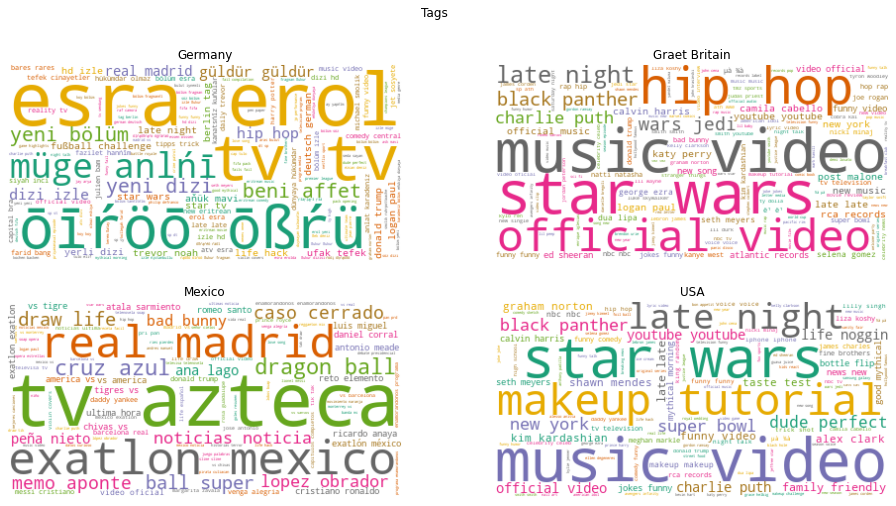

In [ ]:
plt.rcParams['figure.figsize'] = [16, 8]

countries = ['Germany','Graet Britain','Mexico','USA']

# Create subplots for each comedian
for index, country in enumerate(data_dtm_trans[2].columns):
    wc.generate(List_of_txt_frames[2].tags[country])
    
    plt.subplot(2, 2, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(countries[index])

plt.suptitle('Tags')    
plt.show()

There is a fundamemtal problem on the German data. At Germany, there is strong component of immigration from Turkey, which make that text data is heavily Split between German written and Turkish written text. A proper data treatment for German text data requires further cleaning. Which is out of the scope of this work.

For all the other datasets we can cleary see bi-grams which let us know which tags are more relevant for each country.

From my  personal prespective, stands the word exatlón, from the Mexican data, which appears to be a popular Tv Mexican show from the channel azteca TV 

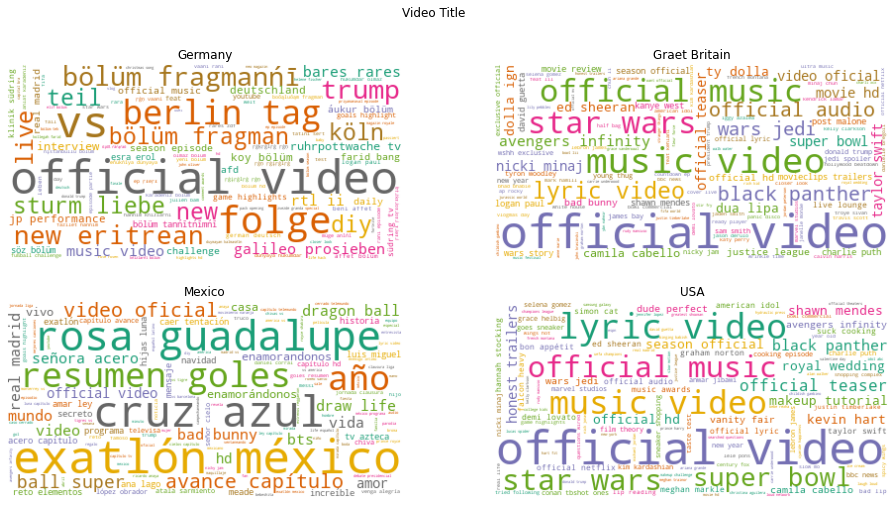

In [ ]:
plt.rcParams['figure.figsize'] = [16, 8]

countries = ['Germany','Graet Britain','Mexico','USA']

# Create subplots for each comedian
for index, country in enumerate(data_dtm_trans[0].columns):
    wc.generate(List_of_txt_frames[0].title[country])
    
    plt.subplot(2, 2, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(countries[index])

plt.suptitle('Video Title')    
plt.show()

From these world cloud, kind of stands how the word Trump appears more at the German data than at the data from USA.

TV and sports seems to be more relevant in México than in the other countries. Cruz Azul appears to be an important socer team in Mexico.

Music related videos seems to be quite popular.

Star wars and Avengers releted content appers to be specially popular at Great Britain and USA.

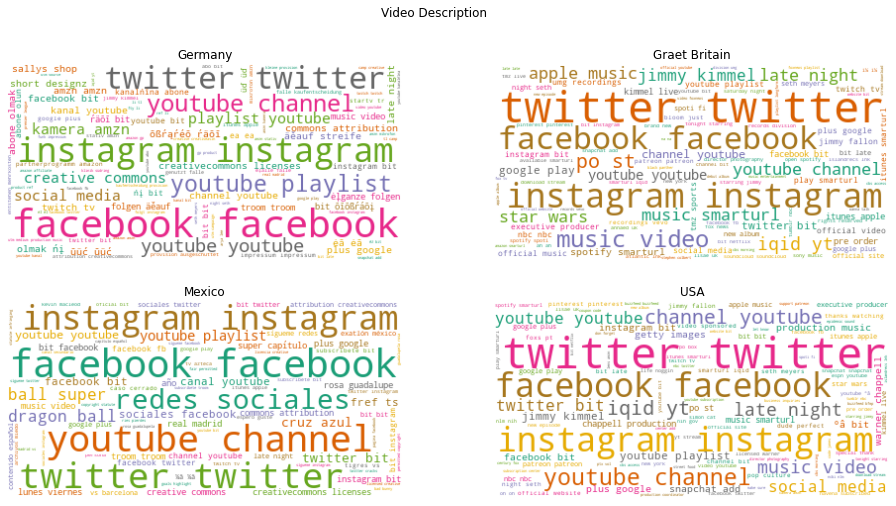

In [ ]:
plt.rcParams['figure.figsize'] = [16, 8]

countries = ['Germany','Graet Britain','Mexico','USA']

# Create subplots for each comedian
for index, country in enumerate(data_dtm_trans[3].columns):
    wc.generate(List_of_txt_frames[3].description[country])
    
    plt.subplot(2, 2, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(countries[index])

plt.suptitle('Video Description')    
plt.show()

The Video description needs further cleanning. We have mainlly capture links to other webs presents on the description. Which means that at the description, people place links to social networks

## Differences in the vocabulary

We can compare differences in vocabulary. For easy comparasion, We will use only english written text

In [ ]:
# Find the number of unique words per country

# Identify the non-zero items in the document-term matrix, meaning that the word occurs at least once
unique_list = []
countries=['Great Britain', 'USA']

for country in countries:
    uniques =data_dtm_trans[2][countries].to_numpy().nonzero()[0].size
    
    unique_list.append(uniques)

# Create a new dataframe that contains this unique word count
data_words = pd.DataFrame(list(zip(countries, unique_list)), columns=['country', 'unique_words'])
data_unique_sort = data_words.sort_values(by='unique_words')
data_unique_sort

,country,unique_words
0,Great Britain,35491
1,USA,35491


We see that both country are using the same amount of different words

Are both countries using the same amount of differnt words?

In [ ]:
# Find the number of unique words per country wihch have been used more than 100 times

# Identify the non-zero items in the document-term matrix, meaning that the word occurs is more than 100 times
unique_list = []
countries=['Great Britain', 'USA']

for country in countries:
    uniques =data_dtm_trans[2][data_dtm_trans[2][country]>100].to_numpy().nonzero()[0].size
    
    unique_list.append(uniques)

# Create a new dataframe that contains this unique word count
data_words = pd.DataFrame(list(zip(countries, unique_list)), columns=['country', 'unique_words'])
data_unique_sort = data_words.sort_values(by='unique_words')
data_unique_sort

,country,unique_words
0,Great Britain,7980
1,USA,9500


Now we see that despite in both countries are using the same set of words, in Great Britain the vocabulary is more spread. At Great Britain is used less the same set of words than in USA.

## Sentiment Analysis

At this point we will not introduce any Neuronal network trained for this analysis. We will simply use TextBlob. TextBlob has the limitation that can only be applied to English. However, we also present a possibility to overcome the limitation. One has also to keep in mind that TextBlob uses a set of pre-fix rules and uses a particular "Lexicon". It is convinient to treat its reasults as a first approach.

We will only treat the text in Spanish. As we state in a former point. The German text includes Turkish and Turkish character that needs further correction. One has always to keep in mind that an automatic translation cannot be good translation, and it will be always a better alternative a neuronal network trained in the specific language where we want to apply it.


In [ ]:
!pip install googletrans==3.1.0a0 #Other versions that not work properlly

In [ ]:
from googletrans import Translator, LANGUAGES

In [ ]:
# we need a translator object

trans = Translator()

In [ ]:
#As example

text_='Ich liebe dich'

output=trans.translate(text_,dest='en')

print(output.text)

I love you


Since it is likely to find miss spellings on the text

In [ ]:
#As example

#This is a nice tool becouse it automatically detects miss spelling and it gives us the most likelly result

text_='No me gustan los uevos rottos'

output=trans.translate(text_,dest='en')

output_2=trans.translate(text_,dest='es')

print(output.text)
print(output_2.text)

I don't like broken eggs
No me gustan los huevos rotos


It is also wotrh to mention that there are instances that a word refering to the something is used either in english or spanish depending on the person or the instances. If translate everything to English is more likelly to catch the words that may be commonly used in both languages.

we will focus only on the video title atribute.

In [ ]:
text_=data_treat[2]['title'][5]
output=trans.translate(text_,dest='en')
print(text_)
print(output.text)


Asi se sintio Terremoto en iraq al bordo de iran 7.6
This is how the Iraq earthquake felt aboard Iran 7.6


In [ ]:
temporal_data= open("/content/drive/MyDrive/Data_sets/YOUTUBE/data_treat_temp_02_01", "rb")

data_treat=pickle.load(temporal_data)

temporal_data.close()

In [ ]:
trans_lam=lambda x: Translator().translate(x,dest='en').text

In [ ]:
tqdm_notebook().pandas()
data_treat[2]['title_translated']=data_treat[2]['title'].progress_apply(trans_lam)

temporal_data = open("/content/drive/MyDrive/Data_sets/YOUTUBE/data_treat_temp_02_01", "wb")

pickle.dump(data_treat,temporal_data)

temporal_data.close()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """Entry point for launching an IPython kernel.


In [ ]:
data_treat[0].head()

In [ ]:
from textblob import TextBlob



In [ ]:
pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

In [ ]:
tqdm_notebook().pandas()

for i in [1,2,3]:

  if i != 2:
    data_treat[i]['title_polarity'] = data_treat[i]['title'].apply(pol)
    data_treat[i]['title_subjectivity'] = data_treat[i]['title'].progress_apply(sub)
  else:
    data_treat[i]['title_polarity'] = data_treat[i]['title_translated'].apply(pol)
    data_treat[i]['title_subjectivity'] = data_treat[i]['title_translated'].progress_apply(sub)  



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """Entry point for launching an IPython kernel.


In [ ]:
#Counting values

counts_sent=[]
counts_pol=[]

for i in [1,2,3]:
  counts_sent.append(data_treat[i]['title_polarity'].value_counts())
  counts_pol.append(data_treat[i]['title_subjectivity'].value_counts())


In [ ]:
#generate a list for the number of times that each element appears per country
sent_GB =[]
sent_MX=[]
sent_US =[]

pol_GB =[]
pol_MX =[]
pol_US =[]

sent_per_country=[sent_GB,sent_MX,sent_US]
pol_per_country =[pol_GB,pol_MX,pol_US]

for i in range(3):
  sent_per_country[i].append(counts_sent[i].index.tolist())
  sent_per_country[i].append(counts_sent[i].tolist())
  

In [ ]:
for i in range(3):
  pol_per_country[i].append(counts_pol[i].index.tolist())
  pol_per_country[i].append(counts_pol[i].tolist())

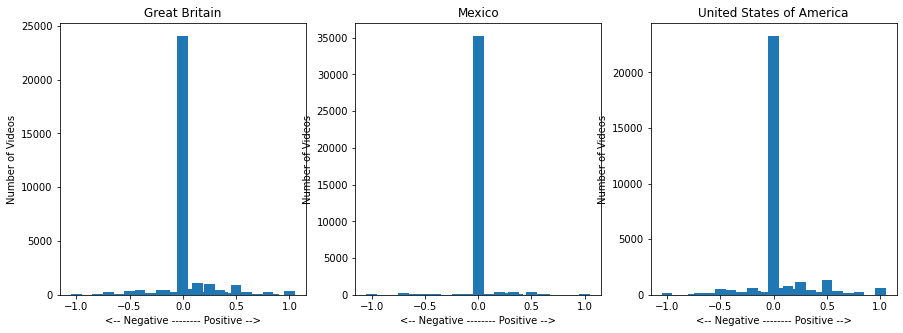

In [ ]:
title_label=['Great Britain','Mexico','United States of America']

plt.figure(figsize=(15,5))

index_=1

for rel in sent_per_country:

  plt.subplot(1,3,index_)
  plt.bar(rel[0],rel[1],width=0.1)
  plt.title(title_label[index_-1],  loc='center')
  plt.xlabel('<-- Negative -------- Positive -->')
  plt.ylabel("Number of Videos") 
  index_+=1 

plt.show()

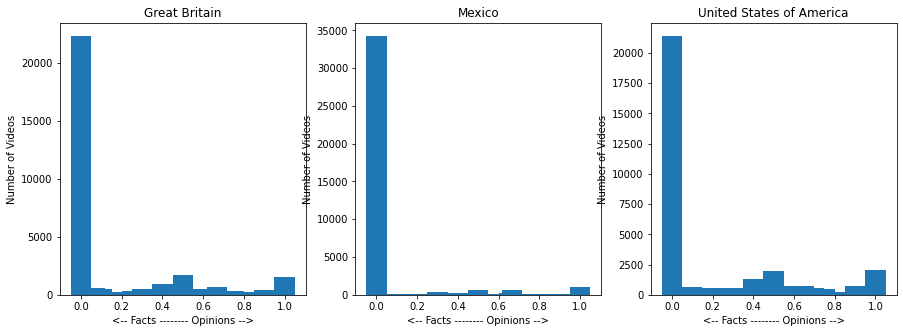

In [ ]:
title_label=['Great Britain','Mexico','United States of America']

plt.figure(figsize=(15,5))

index_=1

for rel in pol_per_country:

  plt.subplot(1,3,index_)
  plt.bar(rel[0],rel[1],width=0.1)
  plt.title(title_label[index_-1],  loc='center')
  plt.xlabel('<-- Facts -------- Opinions -->')
  plt.ylabel("Number of Videos") 
  index_+=1 

plt.show()

Here we can see that the title are mainly describing facts and do reflect a neutrum sentiment to the topic

In [ ]:
data_treat[1].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38026 entries, 0 to 38025
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   video_id                       38026 non-null  object        
 1   trending_date                  38026 non-null  datetime64[ns]
 2   title                          38026 non-null  object        
 3   channel_title                  38026 non-null  object        
 4   category_id                    38026 non-null  int64         
 5   publish_time                   38026 non-null  object        
 6   tags                           38026 non-null  object        
 7   views                          38026 non-null  int64         
 8   likes                          38026 non-null  int64         
 9   dislikes                       38026 non-null  int64         
 10  comment_count                  38026 non-null  int64         
 11  thumbnail_link 

# R analysis and modeling

## Prepare data for R analysis

In [ ]:
data_treat_DE=data_treat[0]
data_treat_GB=data_treat[1]
data_treat_MX=data_treat[2]
data_treat_USA=data_treat[3]

In [ ]:
import rpy2.robjects as ro
from rpy2.robjects.packages import importr
from rpy2.robjects import pandas2ri

from rpy2.robjects.conversion import localconverter

In [ ]:
data_treat_DE = data_treat_DE.dropna()
data_treat_GB = data_treat_GB.dropna()
data_treat_MX = data_treat_MX.dropna()
data_treat_USA = data_treat_USA.dropna()

In [ ]:
data_treat_DE.to_csv ('/content/drive/MyDrive/Data_sets/YOUTUBE/data_treat_DE_02_01_part3.csv', index = False, header=True)
data_treat_GB.to_csv ('/content/drive/MyDrive/Data_sets/YOUTUBE/data_treat_GB_02_01_part3.csv', index = False, header=True)
data_treat_MX.to_csv ('/content/drive/MyDrive/Data_sets/YOUTUBE/data_treat_MX_02_01_part3.csv', index = False, header=True)
data_treat_USA.to_csv ('/content/drive/MyDrive/Data_sets/YOUTUBE/data_treat_USA_02_01_part3.csv', index = False, header=True)

In [ ]:
# activate R magic
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


Load data

In [ ]:
%%R
r_data_DE<-read.csv('/content/drive/MyDrive/Data_sets/YOUTUBE/data_treat_DE_02_01_part3.csv')
r_data_GB<-read.csv('/content/drive/MyDrive/Data_sets/YOUTUBE/data_treat_GB_02_01_part3.csv')
r_data_MX<-read.csv('/content/drive/MyDrive/Data_sets/YOUTUBE/data_treat_MX_02_01_part3.csv')
r_data_USA<-read.csv('/content/drive/MyDrive/Data_sets/YOUTUBE/data_treat_USA_02_01_part3.csv')

Marge dataframes

In [ ]:
%%R

r_data_DE$country<-'DE'
r_data_GB$country<-'GB'
r_data_MX$country<-'MX'
r_data_USA$country<-'USA'

We need to drop the column title_translated to bind the datasets

In [ ]:
%%R

`%notin%` <- Negate(`%in%`)

r_data_MX<-r_data_MX[, names(r_data_MX) %notin% c('title_translated')]

Since we have not use the German dataset for the sentiment analyis, we will not use it for this regresion model

In [ ]:
%%R



r_tdf <- rbind( r_data_GB,r_data_MX,r_data_USA)

In [ ]:
%%R

r_tdf$country<-as.factor(r_tdf$country)

Coding tiemes in appropiate format

In [ ]:
%%R

#transform to the porper data type

r_tdf$trending_date<-as.Date(r_tdf$trending_date)
r_tdf$publish_time<-as.Date(r_tdf$publish_time) 

## PCA for different groups of data

In [ ]:
%%R
not_trans_raw<-c('views','likes','dislikes','comment_count')
not_trans_met<-c('views','rvs','rel_relevance ','positive.sentiment_engagement',
                 'negative.sentiment_engagement','overall_sentiment_engagement')
trans_atr<-c('fviews','flikes','fdislikes','fcomment_count','q_overall_sen_eng')



### Raw data

In [ ]:
%%R
df_dumb<-r_tdf[r_tdf$country == 'MX', names(r_tdf) %in% not_trans_raw]

In [ ]:
%%R
pca_raw<-prcomp(df_dumb, center = TRUE ,scale=TRUE)

In [ ]:
%%R
pca_raw

Standard deviations (1, .., p=4):
[1] 1.7359423 0.7809057 0.5473118 0.2777419

Rotation (n x k) = (4 x 4):
                    PC1         PC2         PC3        PC4
views         0.5162793  0.16843359  0.74992049 -0.3777633
likes         0.5233780  0.46630353 -0.11009689  0.7046383
dislikes      0.4220566 -0.86600437  0.03768053  0.2654897
comment_count 0.5304709  0.06501981 -0.65121280 -0.5387903


In [ ]:
%%R
summary(pca_raw)

Importance of components:
                          PC1    PC2     PC3     PC4
Standard deviation     1.7359 0.7809 0.54731 0.27774
Proportion of Variance 0.7534 0.1525 0.07489 0.01929
Cumulative Proportion  0.7534 0.9058 0.98071 1.00000


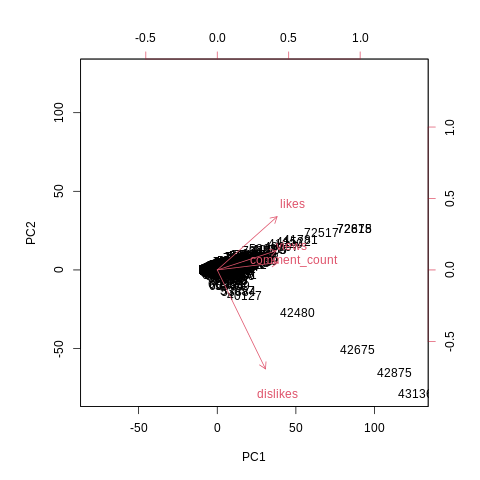

In [ ]:
%%R

biplot(pca_raw, scale=0)

For This case with just PC 1 and PC2 we can explain $90.5\%$ of the variace

### Metrics

In [ ]:
%%R

df_dumb<-r_tdf[r_tdf$country == 'MX', names(r_tdf) %in% not_trans_met]

pca_metric<-prcomp(df_dumb, center=TRUE,scale=TRUE)

In [ ]:
%%R
pca_metric

Standard deviations (1, .., p=5):
[1] 1.523799968 1.116781208 1.000160379 0.656096253 0.007093224

Rotation (n x k) = (5 x 5):
                                       PC1         PC2         PC3         PC4
views                          0.003133160 -0.06518178  0.99665199 -0.04925775
rvs                           -0.443195969  0.48885587  0.07033819  0.74809746
positive.sentiment_engagement -0.631663804 -0.19437494 -0.02288088 -0.24513576
negative.sentiment_engagement -0.001598933 -0.83530048 -0.02756324  0.54748952
overall_sentiment_engagement  -0.636054871 -0.14581756 -0.02130923 -0.27944149
                                        PC5
views                         -5.477792e-05
rvs                           -9.213381e-05
positive.sentiment_engagement -7.089458e-01
negative.sentiment_engagement  4.202420e-02
overall_sentiment_engagement   7.040098e-01


In [ ]:
%%R
summary(pca_metric)

Importance of components:
                          PC1    PC2    PC3     PC4      PC5
Standard deviation     1.5238 1.1168 1.0002 0.65610 0.007093
Proportion of Variance 0.4644 0.2494 0.2001 0.08609 0.000010
Cumulative Proportion  0.4644 0.7138 0.9139 0.99999 1.000000


In this case 3 components can explain $91\%$ of the variance and 4 $99.9\%$ of the variance 

### Power transformed data

In [ ]:
%%R

df_dumb<-r_tdf[r_tdf$country == 'MX', names(r_tdf) %in% trans_atr]

pc_atrib<-prcomp(df_dumb, center=TRUE, scale=TRUE)

In [ ]:
%%R

pc_atrib

Standard deviations (1, .., p=5):
[1] 1.8942531 1.0809585 0.3696100 0.3054861 0.1157617

Rotation (n x k) = (5 x 5):
                         PC1        PC2        PC3         PC4         PC5
fviews            -0.4615991  0.3996896 -0.4612456  0.42102962 -0.48699182
flikes            -0.5110822 -0.1773990 -0.3588376  0.08875422  0.75543555
fdislikes         -0.4835024  0.2895019  0.1115281 -0.81097703 -0.11086848
fcomment_count    -0.4979864 -0.1142763  0.7758896  0.36806079 -0.03843221
q_overall_sen_eng -0.2096575 -0.8437460 -0.2098687 -0.14732365 -0.42235915


In [ ]:
%%R
summary(pc_atrib)

Importance of components:
                          PC1    PC2     PC3     PC4     PC5
Standard deviation     1.8943 1.0810 0.36961 0.30549 0.11576
Proportion of Variance 0.7176 0.2337 0.02732 0.01866 0.00268
Cumulative Proportion  0.7176 0.9513 0.97866 0.99732 1.00000


Compared with the case `raw data`, the transformed atributes can explain a higher percent of the variance with two principal components 

## Modeling Views

In [ ]:
%%R

r_raw<-r_tdf[r_tdf$country=='MX', names(r_tdf) %in%not_trans_raw]
r_metric<-r_tdf[r_tdf$country=='MX', names(r_tdf) %in% not_trans_met]
r_trans<-r_tdf[r_tdf$country=='MX', names(r_tdf) %in% trans_atr]

Select train and test set

In [ ]:
%%R

install.packages("caret")

In [ ]:
%%R

library(caret)

R[write to console]: Loading required package: lattice

R[write to console]: Loading required package: ggplot2



In [ ]:
%%R
set.seed(123)

train.indice <- sample(1:dim(r_raw)[1],(dim(r_raw)[1]*85)/100)

train_raw <- r_raw[ train.indice,]
train_metric<-r_metric[train.indice,]
train_trans<-r_trans[train.indice,]

test_raw  <- r_raw[-train.indice,]
test_metric<-r_metric[-train.indice,]
test_trans<-r_trans[-train.indice,]

In [ ]:
%%R

model_raw_1 <- lm(views ~ ., data = train_raw)
model_metric_1 <- lm(views ~ ., data = train_metric)
model_trans_1 <- lm(fviews ~ ., data = train_trans)


In [ ]:
%%R

library(caret)

In [ ]:
%%R



model_raw_2 <- train(views ~ .,
               data = train_raw,
               preProcess = c("center", "scale"),
               method = "lm")

model_metric_2 <- train(views ~ .,
               data = train_metric,
               preProcess = c("center", "scale"),
               method = "lm")

model_trans_2 <- train(fviews ~ .,
               data = train_trans,
               preProcess = c("center", "scale"),
               method = "lm")



In [ ]:
%%R
summary(model_raw_1)


Call:
lm(formula = views ~ ., data = train_raw)

Residuals:
      Min        1Q    Median        3Q       Max 
-16475586    -76870    -60851     -7816  40233283 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)   72187.8206  4767.4547   15.14   <2e-16 ***
likes            18.6386     0.1109  168.10   <2e-16 ***
dislikes         56.6603     0.5325  106.40   <2e-16 ***
comment_count   -36.1855     0.7504  -48.22   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 854800 on 33401 degrees of freedom
Multiple R-squared:  0.7521,	Adjusted R-squared:  0.7521 
F-statistic: 3.378e+04 on 3 and 33401 DF,  p-value: < 2.2e-16



In [ ]:
%%R
summary(model_raw_2)


Call:
lm(formula = .outcome ~ ., data = dat)

Residuals:
      Min        1Q    Median        3Q       Max 
-16475586    -76870    -60851     -7816  40233283 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)     342649       4677   73.27   <2e-16 ***
likes          1557695       9266  168.10   <2e-16 ***
dislikes        649920       6108  106.40   <2e-16 ***
comment_count  -511656      10610  -48.22   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 854800 on 33401 degrees of freedom
Multiple R-squared:  0.7521,	Adjusted R-squared:  0.7521 
F-statistic: 3.378e+04 on 3 and 33401 DF,  p-value: < 2.2e-16



In [ ]:
%%R
summary(model_metric_2)


Call:
lm(formula = .outcome ~ ., data = dat)

Residuals:
      Min        1Q    Median        3Q       Max 
 -2664576   -328863   -264166   -110950 100413792 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                     342649       9384  36.514  < 2e-16 ***
rvs                              67316      11800   5.705 1.17e-08 ***
positive.sentiment_engagement -1668216     937171  -1.780   0.0751 .  
negative.sentiment_engagement   176857      56360   3.138   0.0017 ** 
overall_sentiment_engagement   1604502     930769   1.724   0.0847 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1715000 on 33400 degrees of freedom
Multiple R-squared:  0.002063,	Adjusted R-squared:  0.001944 
F-statistic: 17.26 on 4 and 33400 DF,  p-value: 3.71e-14



In [ ]:
%%R
summary(model_trans_2)


Call:
lm(formula = .outcome ~ ., data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.9024 -0.1073 -0.0029  0.1216  2.4695 

Coefficients:
                    Estimate Std. Error  t value Pr(>|t|)    
(Intercept)        7.8118693  0.0009869 7915.467  < 2e-16 ***
flikes             1.0083187  0.0034795  289.786  < 2e-16 ***
fdislikes         -0.0047087  0.0028233   -1.668   0.0954 .  
fcomment_count    -0.0184368  0.0024237   -7.607 2.88e-14 ***
q_overall_sen_eng -0.5901333  0.0019171 -307.820  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1804 on 33400 degrees of freedom
Multiple R-squared:  0.9532,	Adjusted R-squared:  0.9532 
F-statistic: 1.701e+05 on 4 and 33400 DF,  p-value: < 2.2e-16



We can improce the model with metrics and the one using power transformed data by removing the attributes which are note statistacally significants

In [ ]:
%%R

str(train_trans)

'data.frame':	33405 obs. of  4 variables:
 $ fviews        : num  7.5 7.38 7.44 7.78 8.79 ...
 $ flikes        : num  6.74 4.67 5.11 5.27 8.57 ...
 $ fdislikes     : num  3.57 2.7 2.94 3.64 5.59 ...
 $ fcomment_count: num  5.21 4.08 4.86 4.5 8.32 ...


In [ ]:
%%R

model_metric <- train(views ~ rvs+negative.sentiment_engagement,
               data = train_metric,
               preProcess = c("center", "scale"),
               method = "lm")


model_trans_3 <-lm(fviews ~ flikes+fcomment_count+q_overall_sen_eng, data = train_trans)

model_trans_4 <- train(fviews ~ flikes+fcomment_count+q_overall_sen_eng,
               data = train_trans,
               preProcess = c("center", "scale"),
               method = "lm")

In [ ]:
%%R
summary(model_metric)



Call:
lm(formula = .outcome ~ ., data = dat)

Residuals:
      Min        1Q    Median        3Q       Max 
 -2300797   -322748   -269302   -119399 100426629 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                     342649       9387  36.501  < 2e-16 ***
rvs                              37962       9970   3.807 0.000141 ***
negative.sentiment_engagement    63739       9970   6.393 1.65e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1716000 on 33402 degrees of freedom
Multiple R-squared:  0.001314,	Adjusted R-squared:  0.001254 
F-statistic: 21.98 on 2 and 33402 DF,  p-value: 2.901e-10



For this case the adjusted R squared has reduced its value compared with the model with more atributes. W can discard this model

In [ ]:
%%R
summary(model_trans_1)


Call:
lm(formula = fviews ~ flikes + fcomment_count + q_overall_sen_eng, 
    data = train_trans)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.89895 -0.10728 -0.00287  0.12168  2.45757 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)        3.952236   0.005480  721.24   <2e-16 ***
flikes             0.616776   0.001520  405.81   <2e-16 ***
fcomment_count    -0.009323   0.001088   -8.57   <2e-16 ***
q_overall_sen_eng -0.587970   0.001208 -486.78   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1804 on 33401 degrees of freedom
Multiple R-squared:  0.9532,	Adjusted R-squared:  0.9532 
F-statistic: 2.268e+05 on 3 and 33401 DF,  p-value: < 2.2e-16



In [ ]:
%%R
summary(model_trans_2)


Call:
lm(formula = .outcome ~ ., data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.89895 -0.10728 -0.00287  0.12168  2.45757 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        7.8118693  0.0009869 7915.26   <2e-16 ***
flikes             1.0042391  0.0024746  405.81   <2e-16 ***
fcomment_count    -0.0197121  0.0023000   -8.57   <2e-16 ***
q_overall_sen_eng -0.5876495  0.0012072 -486.78   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1804 on 33401 degrees of freedom
Multiple R-squared:  0.9532,	Adjusted R-squared:  0.9532 
F-statistic: 2.268e+05 on 3 and 33401 DF,  p-value: < 2.2e-16



Since the adjusted R squared are identencal we will formally check the contribution of the atribute to the model

In [ ]:
%%R

anova(model_trans_1,model_trans_3)

Analysis of Variance Table

Model 1: fviews ~ flikes + fdislikes + fcomment_count + q_overall_sen_eng
Model 2: fviews ~ flikes + fcomment_count + q_overall_sen_eng
  Res.Df    RSS Df Sum of Sq      F  Pr(>F)  
1  33400 1086.7                              
2  33401 1086.8 -1 -0.090499 2.7815 0.09537 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


The p values is higher than 0.05, therefore we can not reject the null hypotesis and therefore both models are equally good and we will choose the model with less variables as the better model.

### Predictions on Views

In [ ]:
%%R


model_trans <- train(fviews ~ flikes+fcomment_count+q_overall_sen_eng,
               data = train_trans,
               preProcess = c("center", "scale"),
               method = "lm")

In [ ]:
%%R


predictions_raw <- predict(model_raw, test_raw)
RMSE_raw<-RMSE(predictions_raw, test_raw$views)
RMSE_raw

[1] 925483.1


In [ ]:
%%R

RMSE_raw/max(scale(test_raw$views))


[1] 19972.08


In [ ]:
%%R

predictions_trans <- predict(model_trans, test_trans)
RMSE_trans<-RMSE(predictions_trans, test_trans$fviews)
RMSE_trans

[1] 0.1830192


In [ ]:
%%R

RMSE_trans/max(scale(test_trans$fviews))

[1] 0.05531404


Comparing the results seems a quite outstanding, that we have a RMSE of 5% relative to the scaled transformed maximum number of views  and the RMSE of the non power transformed data is more than 2000 times compared with the max numenber of views scaled.

### Categories Grouped by statistic view significance and country

In [ ]:
%%R

install.packages("stats")

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
%%R

library(stats)



In [ ]:
%%R

cate<-r_tdf[r_tdf$country=='MX', names(r_tdf) %in% c("category_id")]

data<-r_tdf[r_tdf$country=='MX', names(r_tdf) %in% c("fviews")]

a continuación se realizan todas las combinaciones posibles de comparaciones

In [ ]:
%%R

pairwise.t.test(data,cate, p.adj=c("none"))



	Pairwise comparisons using t tests with pooled SD 

data:  data and cate 

   1       2       10      15      17      19      20      22      23     
2  0.20008 -       -       -       -       -       -       -       -      
10 < 2e-16 1.3e-14 -       -       -       -       -       -       -      
15 0.96430 0.45872 0.00021 -       -       -       -       -       -      
17 6.8e-07 0.00013 < 2e-16 0.15917 -       -       -       -       -      
19 0.75190 0.60683 2.4e-06 0.80325 0.04235 -       -       -       -      
20 8.6e-14 9.4e-09 0.00621 0.00622 1.1e-05 0.00040 -       -       -      
22 < 2e-16 3.8e-08 < 2e-16 5.1e-05 < 2e-16 1.2e-05 < 2e-16 -       -      
23 9.0e-16 9.8e-09 8.4e-05 0.00877 1.7e-06 0.00060 0.65104 < 2e-16 -      
24 0.19357 0.43108 < 2e-16 0.69215 < 2e-16 0.93435 < 2e-16 < 2e-16 < 2e-16
25 < 2e-16 0.00173 < 2e-16 0.00700 < 2e-16 0.00543 < 2e-16 5.8e-12 < 2e-16
26 < 2e-16 0.00029 < 2e-16 0.00275 < 2e-16 0.00177 < 2e-16 9.5e-07 < 2e-16
27 < 2e-16 1.6e-12 < 2e

In [ ]:
%%R

install.packages("agricolae")

In [ ]:
%%R

library(agricolae)

In [ ]:
%%R

results<-lm(data~cate)

In [ ]:
%%R


LSD.test(results,"cate",group=T,p.adj="bonferroni",console=T)


Study: results ~ "cate"

LSD t Test for data 
P value adjustment method: bonferroni 

Mean Square Error:  0.684862 

cate,  means and individual ( 95 %) CI

       data       std     r      LCL      UCL      Min       Max
1  7.878937 0.8202726  1247 7.833003 7.924870 4.947322 10.163429
2  7.807444 0.7289203   250 7.704857 7.910031 5.569684  9.359439
10 8.214677 0.9156281  3296 8.186424 8.242930 5.554065 10.539652
15 7.883022 1.0116613    83 7.704980 8.061065 6.048545  9.825642
17 8.008740 0.8201421  3988 7.983055 8.034426 4.306390 10.124966
19 7.854130 0.6307216   115 7.702874 8.005387 5.798781  9.268447
20 8.134795 0.8239546   989 8.083217 8.186373 5.049132  9.999128
22 7.522938 0.7803340  7982 7.504782 7.541093 4.683853 10.118224
23 8.120238 0.8716565  1705 8.080955 8.159520 5.210101  9.924411
24 7.847919 0.7835948 13143 7.833770 7.862067 4.646937 10.683125
25 7.641420 0.7739973  3019 7.611899 7.670941 5.089725  9.813397
26 7.613934 0.8151116  2462 7.581244 7.646625 5.745926 10.0410

We repit the analysis per country

In [ ]:
%%R

cate<-r_tdf[r_tdf$country=='GB', names(r_tdf) %in% c("category_id")]

data<-r_tdf[r_tdf$country=='GB', names(r_tdf) %in% c("fviews")]

results<-lm(data~cate)

LSD.test(results,"cate",group=T,p.adj="bonferroni",console=T)


Study: results ~ "cate"

LSD t Test for data 
P value adjustment method: bonferroni 

Mean Square Error:  2.130313 

cate,  means and individual ( 95 %) CI

       data       std     r      LCL      UCL       Min      Max
1  12.34560 1.3950955  2409 12.28732 12.40389  7.331304 15.30402
2  11.97365 1.6886674   123 11.71570 12.23160  7.090145 13.71593
10 13.21821 1.4646203 13531 13.19361 13.24280  7.220081 17.00658
15 11.82493 1.0747556   515 11.69887 11.95099  9.353221 13.85559
17 11.60773 1.4615439  1824 11.54075 11.67471  7.123803 14.83689
19 11.45735 1.6611978    86 11.14886 11.76583  7.584226 13.84896
20 11.48043 1.1664307  1700 11.41104 11.54981  8.294885 14.65737
22 11.54811 1.4300399  2702 11.49308 11.60315  6.689725 14.89048
23 12.37186 1.1368868  1758 12.30363 12.44009  8.617401 15.31981
24 12.23578 1.3235894  8718 12.20514 12.26642  7.905299 16.33616
25 11.39971 1.3473260  1191 11.31681 11.48260  6.394510 14.69180
26 11.29497 1.0810740  1917 11.22963 11.36031  6.903249 14.093

In [ ]:
%%R

cate<-r_tdf[r_tdf$country=='USA', names(r_tdf) %in% c("category_id")]

data<-r_tdf[r_tdf$country=='USA', names(r_tdf) %in% c("fviews")]

results<-lm(data~cate)

LSD.test(results,"cate",group=T,p.adj="bonferroni",console=T)


Study: results ~ "cate"

LSD t Test for data 
P value adjustment method: bonferroni 

Mean Square Error:  13.23653 

cate,  means and individual ( 95 %) CI

       data      std    r      LCL      UCL       Min      Max
1  21.76253 3.998484 2256 21.61239 21.91266  9.971267 31.97569
2  19.83923 3.464068  348 19.45697 20.22149 10.964458 29.75576
10 22.55187 4.387904 6421 22.46288 22.64086  9.282994 36.29046
15 19.58556 2.949133  913 19.34956 19.82156 10.490904 25.98987
17 20.38557 3.893810 2113 20.23044 20.54070  7.943408 30.15364
19 19.74525 2.674368  400 19.38870 20.10180  8.738987 29.60694
20 22.17186 3.379124  803 21.92021 22.42351  8.893749 28.65398
22 20.36744 3.394288 3103 20.23942 20.49545  8.383338 30.56376
23 21.04812 2.889879 3447 20.92666 21.16958  9.482171 30.16208
24 20.76888 3.513419 9674 20.69638 20.84138  8.229932 34.99791
25 18.01161 3.592990 2298 17.86286 18.16037  7.677493 26.75187
26 19.93624 2.846656 4122 19.82517 20.04730  8.723909 31.93769
27 19.77711 2.272232 16